In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy.stats import zscore
# from sklearn.linear_model import LinearRegression

%matplotlib inline

sns.set()

In [2]:
r_insurance_df = pd.read_csv('health_insurance.csv')
r_access_df = pd.read_csv('healthcare_access.csv')

In [3]:
r_insurance_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [4]:
r_access_df

,Year,State,Yes,No,Category,Condition,Location 1
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Nationwide (States, DC, and Territories)\n"
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Nationwide (States and DC)\n
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Guam\n
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Puerto Rico\n
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Virgin Islands\n
...,...,...,...,...,...,...,...
1635,2010,Alabama,79.90%,20.10%,Health Care Access/Coverage,Adults aged 18-64 who have any kind of health ...,"Alabama\n(32.84057112200048, -86.63186076199969)"
1636,1996,Mississippi,82.70%,17.30%,Health Care Access/Coverage,Adults aged 18-64 who have any kind of health ...,"Mississippi\n(32.745510099000455, -89.53803082..."
1637,1996,Virginia,85.40%,14.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Virginia\n(37.54268067400045, -78.45789046299967)"
1638,2006,Wyoming,82.10%,17.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Wyoming\n(43.23554134300048, -108.10983035299967)"


In [5]:
r_insurance_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [6]:
r_access_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1640 non-null   int64 
 1   State       1640 non-null   object
 2   Yes         1640 non-null   object
 3   No          1640 non-null   object
 4   Category    1640 non-null   object
 5   Condition   1640 non-null   object
 6   Location 1  1640 non-null   object
dtypes: int64(1), object(6)
memory usage: 89.8+ KB


In [7]:
insurance_df = r_insurance_df.copy()

access_df = r_access_df.copy()

In [8]:
insurance_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [9]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [10]:
insurance_df.shape

(15000, 13)

In [11]:
insurance_df.columns.to_list()

['age',
 'sex',
 'weight',
 'bmi',
 'hereditary_diseases',
 'no_of_dependents',
 'smoker',
 'city',
 'bloodpressure',
 'diabetes',
 'regular_ex',
 'job_title',
 'claim']

In [12]:
access_df.head()

,Year,State,Yes,No,Category,Condition,Location 1
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Nationwide (States, DC, and Territories)\n"
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Nationwide (States and DC)\n
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Guam\n
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Puerto Rico\n
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Virgin Islands\n


In [13]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1640 non-null   int64 
 1   State       1640 non-null   object
 2   Yes         1640 non-null   object
 3   No          1640 non-null   object
 4   Category    1640 non-null   object
 5   Condition   1640 non-null   object
 6   Location 1  1640 non-null   object
dtypes: int64(1), object(6)
memory usage: 89.8+ KB


In [14]:
access_df.shape

(1640, 7)

In [15]:
access_df.columns.to_list()

['Year', 'State', 'Yes', 'No', 'Category', 'Condition', 'Location 1']

In [16]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1640 non-null   int64 
 1   State       1640 non-null   object
 2   Yes         1640 non-null   object
 3   No          1640 non-null   object
 4   Category    1640 non-null   object
 5   Condition   1640 non-null   object
 6   Location 1  1640 non-null   object
dtypes: int64(1), object(6)
memory usage: 89.8+ KB


In [17]:
insurance_df.isna().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [18]:
insurance_df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [19]:
access_df.isna().sum()

Year          0
State         0
Yes           0
No            0
Category      0
Condition     0
Location 1    0
dtype: int64

In [20]:
access_df.isnull().sum()

Year          0
State         0
Yes           0
No            0
Category      0
Condition     0
Location 1    0
dtype: int64

# Data Dictionary

###### Dataset Description for insurance_df

age: Age of the client (Numeric)

gender:Gender of client (male=0; female=1)(Numeric)

weight: Weight of the client in (kg) (Numeric)

bmi: Body mass index, providing an understanding of body with the ratio of height to weight (Numeric)

hereditary_diseases: A client suffering from a hereditary diseases or not (no diseases=0;  has hereditary diseases=1) (Numeric)
noofdependents: Number of dependents for the client (Numeric)

smoker: Indicates client is a smoker or a non-smoker (non-smoker=0;smoker=1) (Numeric)

state: The state in which the client resides (Categoric)

diabetes: Indicates client suffers from diabetes or not (non-diabetic=0; diabetic=1) (Numeric)

regular_ex: A client regularly excercises or not (no-excercise=0; excercise=1) (Numeric)

job_title: Job profile of the client (Categoric)

claim: The amount claimed by the client (Numeric)


###### Dataset Description for access_df 

year: The years clients were surveyed between 1995-2010

state: The state in which the client resides (Categoric)

yes: The percentage of clients who have health care coverage (Numeric)

no: The percentage of clients who do not have health care coverage (Numeric)


# Summary Statistics 

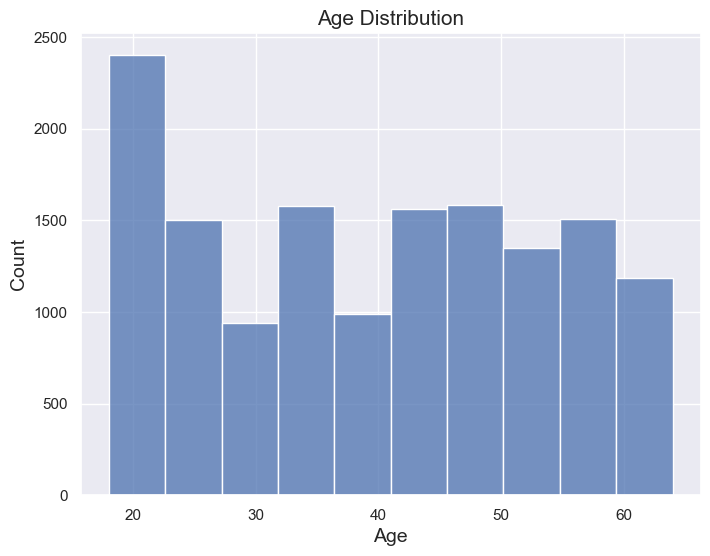

In [21]:
plt.figure(figsize=(8,6))

ax = sns.histplot(data=insurance_df, x='age', palette='magma', bins=10)

plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Age Distribution", fontsize=15);

Insight: Most of the clients are at the age of 18,19, and 20 years old.

In [22]:
insurance_df['age'].describe()

count    14604.000000
mean        39.547521
std         14.015966
min         18.000000
25%         27.000000
50%         40.000000
75%         52.000000
max         64.000000
Name: age, dtype: float64

In [23]:
print(insurance_df["age"].value_counts())

18.0    768
19.0    653
21.0    368
50.0    363
51.0    357
54.0    346
56.0    341
42.0    340
52.0    339
34.0    333
22.0    333
47.0    331
24.0    326
28.0    324
45.0    323
59.0    321
33.0    319
32.0    317
27.0    315
35.0    314
55.0    313
40.0    313
23.0    312
53.0    309
30.0    306
48.0    304
41.0    303
46.0    303
43.0    298
44.0    297
36.0    294
31.0    289
49.0    285
20.0    279
26.0    278
37.0    278
25.0    272
58.0    271
38.0    265
57.0    261
64.0    253
62.0    249
60.0    244
63.0    228
61.0    211
39.0    135
29.0     23
Name: age, dtype: int64


/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


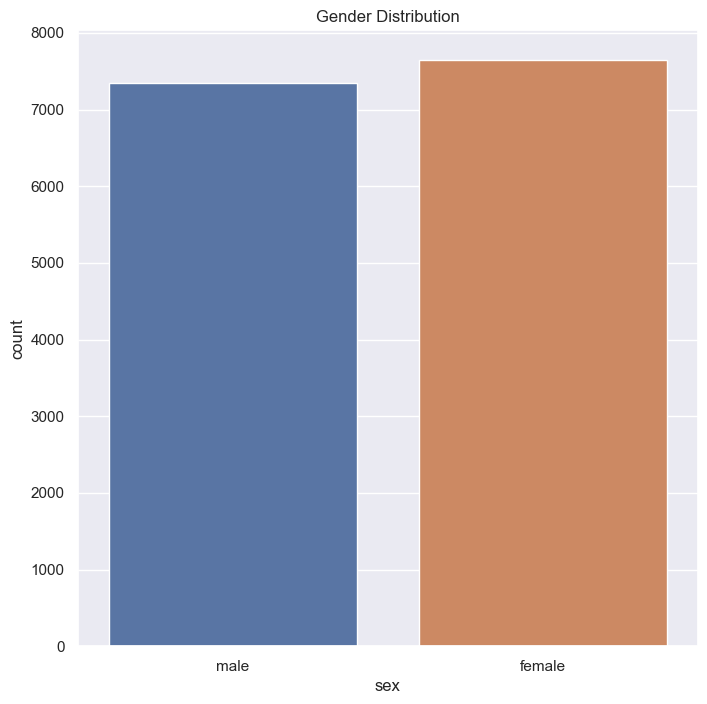

female    7652
male      7348
Name: sex, dtype: int64


In [24]:
plt.figure(figsize=(8,8))
sns.countplot(insurance_df['sex'])
plt.title("Gender Distribution")
plt.show()
print(insurance_df["sex"].value_counts())

Insight: The gender of the clients are close in count, there are slightly more female clients.

In [25]:
insurance_df['sex'].describe()

count      15000
unique         2
top       female
freq        7652
Name: sex, dtype: object

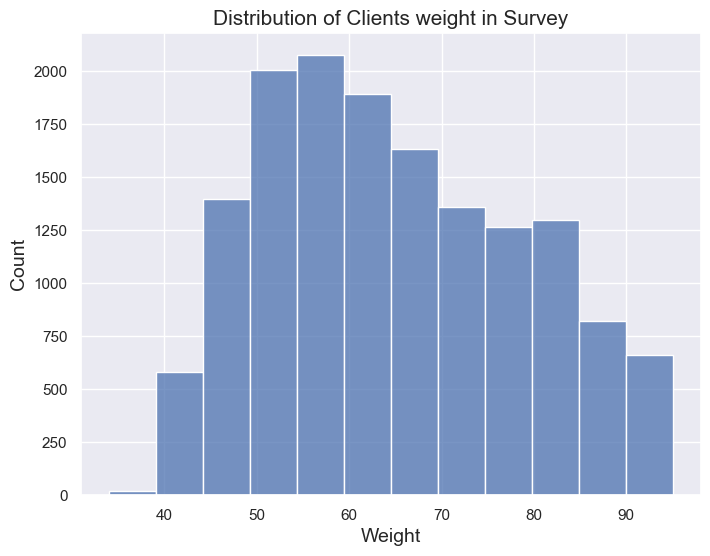

In [26]:
plt.figure(figsize=(8,6))

ax = sns.histplot(data=insurance_df, x='weight', palette='magma', bins=12)

plt.xlabel("Weight", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.title("Distribution of Clients weight in Survey", fontsize=15);

Insight: Most of the clients weight is 50 to 60kg.

In [27]:
print(insurance_df["weight"].value_counts())

56    545
54    490
60    456
62    456
59    446
67    428
50    402
52    398
57    398
64    381
65    370
80    365
51    361
55    361
53    352
63    330
46    327
79    326
58    324
78    308
47    303
69    303
76    294
73    293
70    291
84    287
72    281
48    280
66    271
61    269
82    262
68    258
71    258
45    253
74    234
49    232
75    224
88    220
90    203
81    200
89    187
83    184
87    165
41    158
85    152
43    151
44    137
94    136
77    112
86     99
95     91
91     89
42     89
93     88
92     52
40     48
34     21
36      1
Name: weight, dtype: int64


In [28]:
insurance_df['weight'].describe()

count    15000.000000
mean        64.909600
std         13.701935
min         34.000000
25%         54.000000
50%         63.000000
75%         76.000000
max         95.000000
Name: weight, dtype: float64

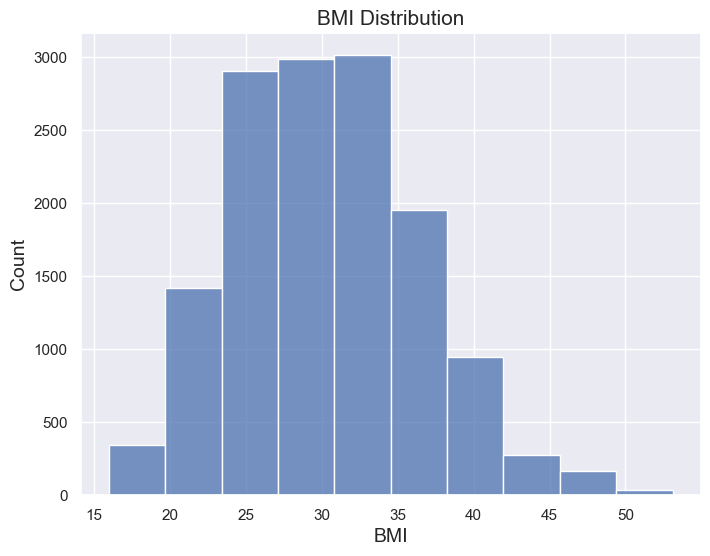

In [29]:
plt.figure(figsize=(8,6))

ax = sns.histplot(data=insurance_df, x='bmi', palette='magma', bins=10)

plt.xlabel("BMI", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.title("BMI Distribution", fontsize=15);

Insight: Most of the clients BMI is 30.

In [30]:
insurance_df['bmi'].describe()

count    14044.000000
mean        30.266413
std          6.122950
min         16.000000
25%         25.700000
50%         29.400000
75%         34.400000
max         53.100000
Name: bmi, dtype: float64

In [31]:
print(insurance_df["bmi"].value_counts())

33.3    192
27.6    191
28.9    190
28.3    167
31.4    166
       ... 
19.4      1
38.5      1
47.8      1
45.7      1
18.8      1
Name: bmi, Length: 269, dtype: int64


/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


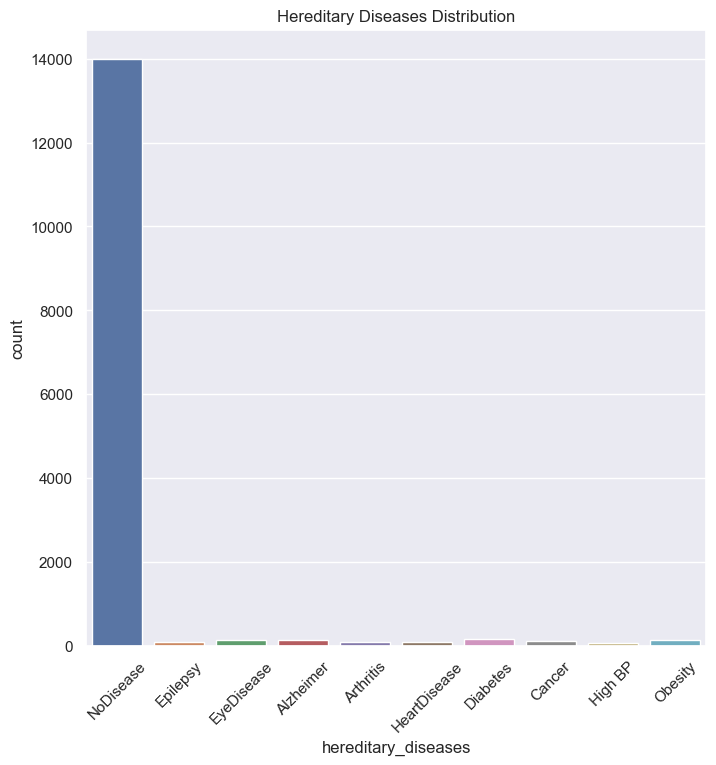

NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: hereditary_diseases, dtype: int64


In [32]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['hereditary_diseases']);
plt.title("Hereditary Diseases Distribution");
plt.xticks(rotation = 45)
plt.show();
print(insurance_df["hereditary_diseases"].value_counts());

Insight: Most of the clients have no hereditary diseases

In [33]:
insurance_df['hereditary_diseases'].describe()

count         15000
unique           10
top       NoDisease
freq          13998
Name: hereditary_diseases, dtype: object

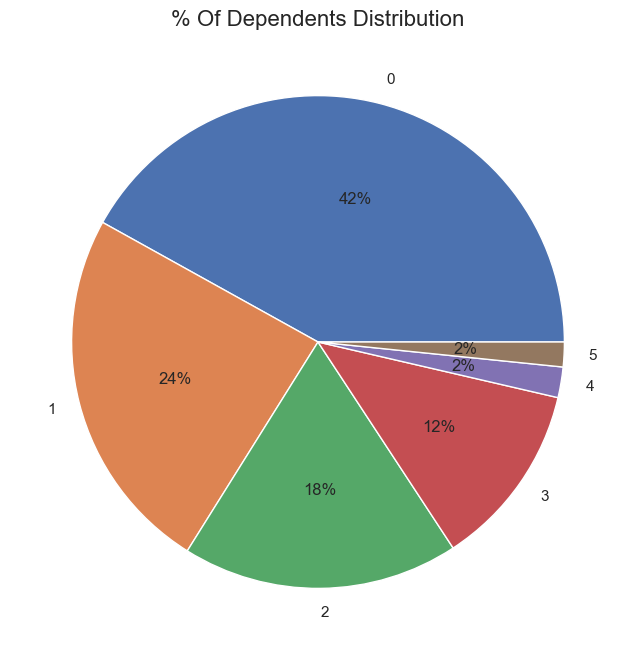

In [34]:
plt.figure(figsize=(8,8))
data = insurance_df['no_of_dependents'].value_counts()
labels = [0, 1, 2, 3, 4, 5]

plt.title("% Of Dependents Distribution", fontsize=16)
ax = plt.pie(data, labels = labels, autopct = '%.0f%%');

Insight: Most of the clients have no dependents.

In [35]:
print(insurance_df["no_of_dependents"].value_counts());

0    6290
1    3625
2    2721
3    1820
4     301
5     243
Name: no_of_dependents, dtype: int64


In [36]:
insurance_df['no_of_dependents'].describe()

count    15000.000000
mean         1.129733
std          1.228469
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: no_of_dependents, dtype: float64

/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


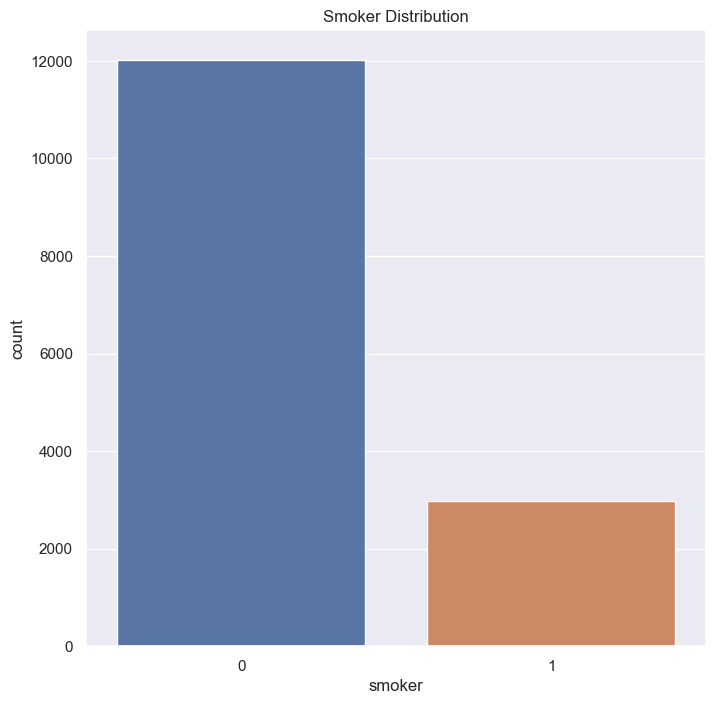

0    12028
1     2972
Name: smoker, dtype: int64


In [37]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['smoker']);
plt.title("Smoker Distribution");
plt.show();
print(insurance_df["smoker"].value_counts());

Insight: Most of the clients are not smokers.

/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


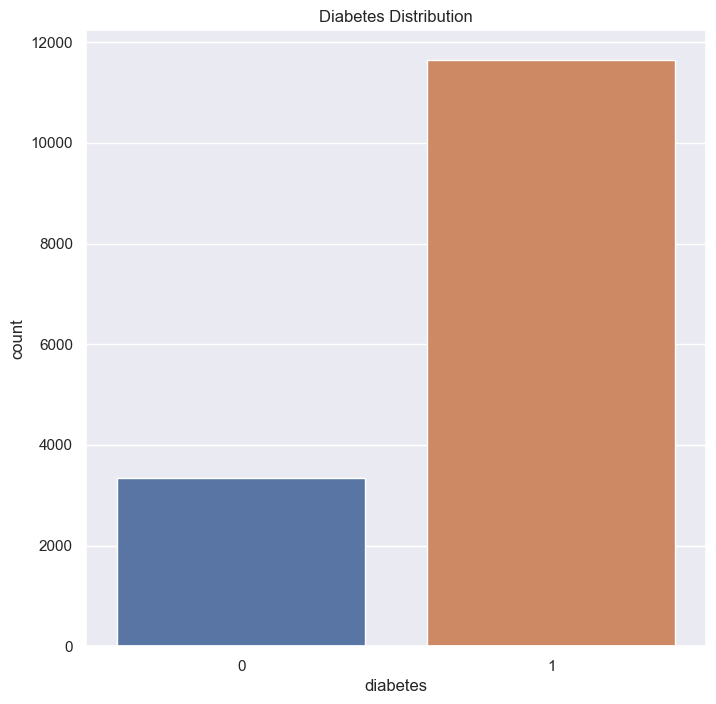

In [38]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['diabetes']);
plt.title("Diabetes Distribution");
plt.show();

Insight: Most of the clients have diabetes.

In [39]:
print(insurance_df["diabetes"].value_counts());

1    11655
0     3345
Name: diabetes, dtype: int64


/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


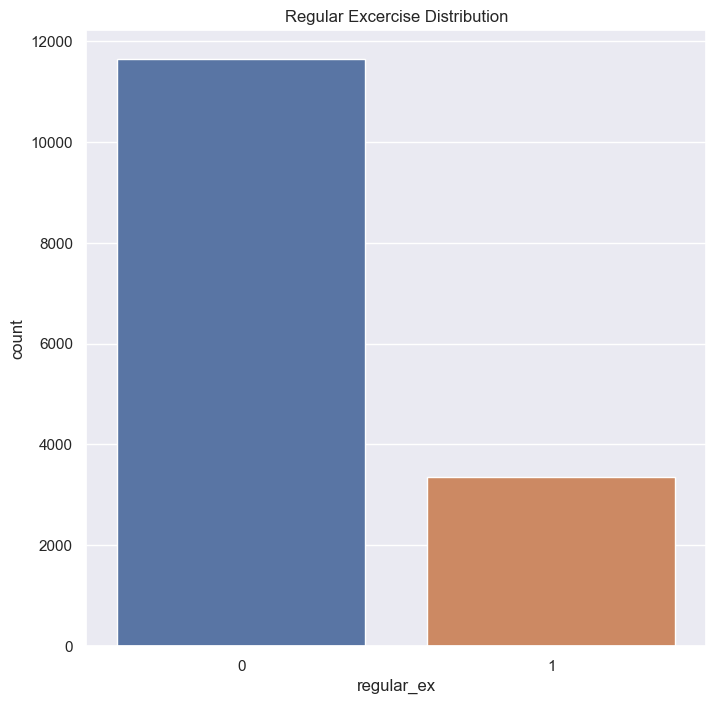

In [40]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['regular_ex']);
plt.title("Regular Excercise Distribution");
plt.show();

Insight: Most of the clients don't perform regular excercise.

In [41]:
print(insurance_df["regular_ex"].value_counts());

0    11638
1     3362
Name: regular_ex, dtype: int64


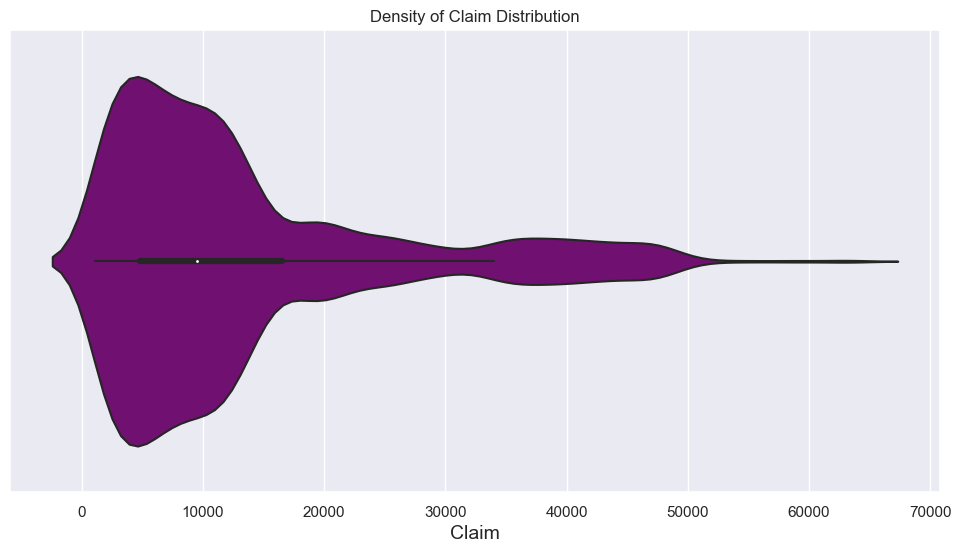

In [42]:
plt.figure(figsize=(12,6))

sns.violinplot(x=insurance_df['claim'], color = 'purple')

plt.xlabel("Claim", fontsize=14)
plt.title("Density of Claim Distribution");

Insight: Most of the claims fall in the area of 10,000 dollars and under.

In [43]:
print(insurance_df["claim"].value_counts());

14210.5    27
9715.8     26
18955.2    25
7256.7     24
2203.5     24
           ..
33584.2     1
35783.2     1
32885.1     1
22460.5     1
19214.1     1
Name: claim, Length: 2054, dtype: int64


# Data Cleaning

### plan 

###### changed on insurance_df

rename sex to gender

rename city to state,changed cities to their abbreviate states 

gender: female(1), male(0)

hereditary_diseases:(no diseases=0; has hereditary diseases=1) 

other variables drop blood pressure variable

###### Missing Values:

- age: Fill the 396 missing values in the age column with the mean.
- bmi: Fill the 956 missing values in the bmi column with the mean.


###### changed on access_df

drop percentage sign from the variables yes and no, and change them from catergory to numeric

state: drop US territories and abbreviate states

other variables dropp (category, condition, and location 1) 





### change variables to lower case

In [44]:
insurance_df.columns = insurance_df.columns.str.lower()

insurance_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [45]:
access_df.columns = access_df.columns.str.lower()
access_df.head()

,year,state,yes,no,category,condition,location 1
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Nationwide (States, DC, and Territories)\n"
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Nationwide (States and DC)\n
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Guam\n
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Puerto Rico\n
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Virgin Islands\n


### drop variables 

In [46]:
insurance_df.drop(columns=['bloodpressure'],inplace=True)
insurance_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,1,0,Farmer,9144.6


In [47]:
insurance_df.drop(columns=['job_title'],inplace=True)
insurance_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,diabetes,regular_ex,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,0,0,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,1,1,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,1,1,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,1,0,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,1,0,1731.7
...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,1,0,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,1,0,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,1,0,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,1,0,9144.6


In [48]:
access_df.drop(columns=['location 1'],inplace=True)
access_df

,year,state,yes,no,category,condition
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage,Do you have any kind of health care coverage?
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?
...,...,...,...,...,...,...
1635,2010,Alabama,79.90%,20.10%,Health Care Access/Coverage,Adults aged 18-64 who have any kind of health ...
1636,1996,Mississippi,82.70%,17.30%,Health Care Access/Coverage,Adults aged 18-64 who have any kind of health ...
1637,1996,Virginia,85.40%,14.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?
1638,2006,Wyoming,82.10%,17.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?


In [49]:
access_df.drop(columns=['condition'],inplace=True)
access_df

,year,state,yes,no,category
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage
...,...,...,...,...,...
1635,2010,Alabama,79.90%,20.10%,Health Care Access/Coverage
1636,1996,Mississippi,82.70%,17.30%,Health Care Access/Coverage
1637,1996,Virginia,85.40%,14.60%,Health Care Access/Coverage
1638,2006,Wyoming,82.10%,17.90%,Health Care Access/Coverage


In [50]:
access_df.drop(columns=['category'],inplace=True)
access_df

,year,state,yes,no
0,2010,"Nationwide (States, DC, and Territories)",85%,15%
1,2010,Nationwide (States and DC),85%,15%
2,2010,Guam,77.80%,22.20%
3,2010,Puerto Rico,92.10%,7.90%
4,2010,Virgin Islands,69.40%,30.60%
...,...,...,...,...
1635,2010,Alabama,79.90%,20.10%
1636,1996,Mississippi,82.70%,17.30%
1637,1996,Virginia,85.40%,14.60%
1638,2006,Wyoming,82.10%,17.90%


### Encoding variables to numeric

In [51]:
insurance_df.hereditary_diseases.unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [52]:
insurance_df.replace({'hereditary_diseases':{'NoDisease':0, 'Epilepsy':1, 'EyeDisease':1, 'Alzheimer':1, 'Arthritis':1,
       'HeartDisease':1, 'Diabetes':1, 'Cancer':1, 'High BP':1, 'Obesity':1}}, inplace= True)

In [53]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   diabetes             15000 non-null  int64  
 9   regular_ex           15000 non-null  int64  
 10  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.3+ MB


/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


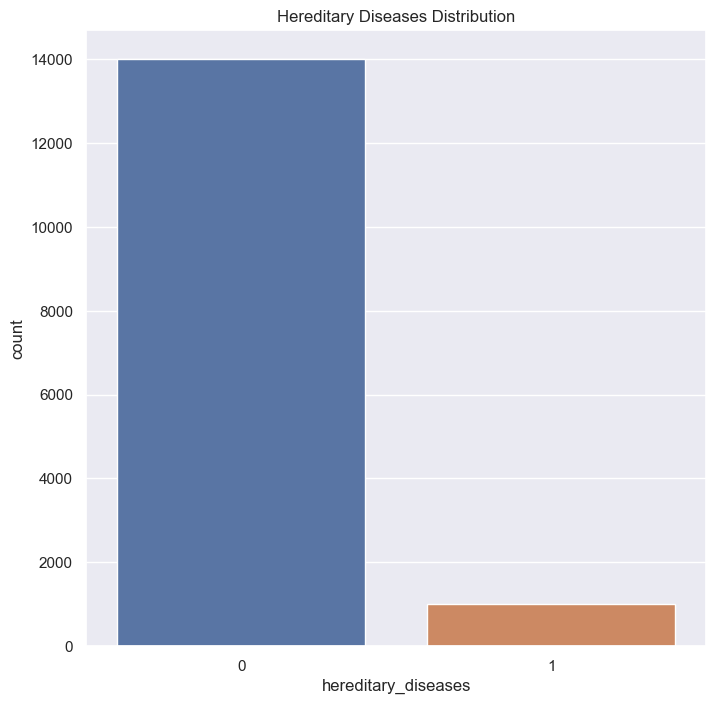

0    13998
1     1002
Name: hereditary_diseases, dtype: int64


In [54]:
plt.figure(figsize=(8,8))
sns.countplot(insurance_df['hereditary_diseases'])
plt.title("Hereditary Diseases Distribution")
plt.show()
print(insurance_df["hereditary_diseases"].value_counts())

In [55]:
insurance_df.replace({'sex':{'male':0, 'female':1}},inplace = True)

In [56]:
insurance_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,diabetes,regular_ex,claim
0,60.0,0,64,24.3,0,1,0,NewYork,0,0,13112.6
1,49.0,1,75,22.6,0,1,0,Boston,1,1,9567.0
2,32.0,1,64,17.8,1,2,1,Phildelphia,1,1,32734.2
3,61.0,1,53,36.4,0,1,1,Pittsburg,1,0,48517.6
4,19.0,1,50,20.6,0,0,0,Buffalo,1,0,1731.7


/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


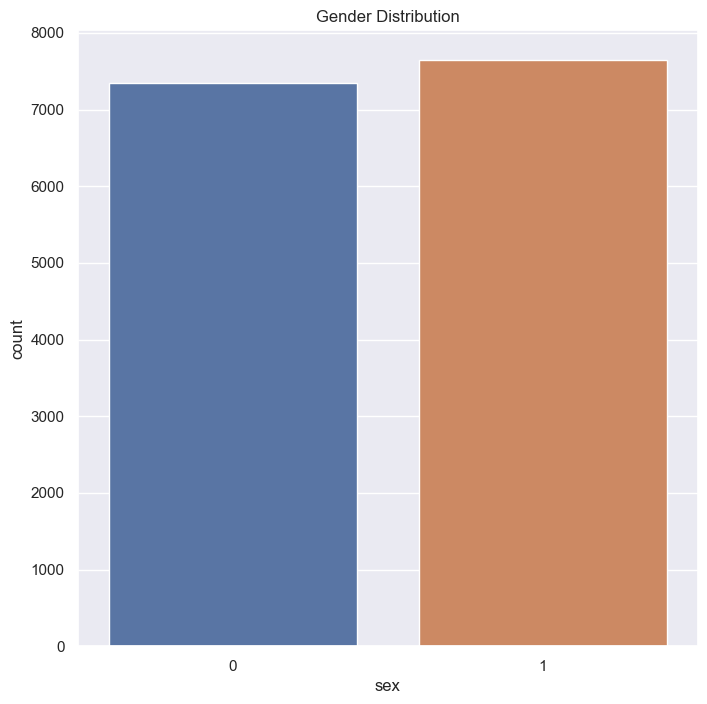

1    7652
0    7348
Name: sex, dtype: int64


In [57]:
plt.figure(figsize=(8,8))
sns.countplot(insurance_df['sex'])
plt.title("Gender Distribution")
plt.show()
print(insurance_df["sex"].value_counts())

In [58]:
access_df.head()

,year,state,yes,no
0,2010,"Nationwide (States, DC, and Territories)",85%,15%
1,2010,Nationwide (States and DC),85%,15%
2,2010,Guam,77.80%,22.20%
3,2010,Puerto Rico,92.10%,7.90%
4,2010,Virgin Islands,69.40%,30.60%


In [59]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    1640 non-null   int64 
 1   state   1640 non-null   object
 2   yes     1640 non-null   object
 3   no      1640 non-null   object
dtypes: int64(1), object(3)
memory usage: 51.4+ KB


In [60]:
access_df['yes'] = access_df['yes'].map(lambda x: x.rstrip('%'))
access_df['yes'] = access_df['yes'].astype(float)

print(access_df.yes)

0       85.0
1       85.0
2       77.8
3       92.1
4       69.4
        ... 
1635    79.9
1636    82.7
1637    85.4
1638    82.1
1639    86.1
Name: yes, Length: 1640, dtype: float64


In [61]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1640 non-null   int64  
 1   state   1640 non-null   object 
 2   yes     1640 non-null   float64
 3   no      1640 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 51.4+ KB


In [62]:
access_df['no'] = access_df['no'].map(lambda x: x.rstrip('%'))
access_df['no'] = access_df['no'].astype(float)

print(access_df.no)

0       15.0
1       15.0
2       22.2
3        7.9
4       30.6
        ... 
1635    20.1
1636    17.3
1637    14.6
1638    17.9
1639    13.9
Name: no, Length: 1640, dtype: float64


In [63]:
access_df.describe()

,year,yes,no
count,1640.000000,1640.000000,1640.000000
mean,2002.665854,84.659634,15.340854
std,4.735653,4.908309,4.908270
min,1995.000000,65.900000,4.300000
25%,1998.000000,81.600000,11.700000
50%,2003.000000,85.400000,14.600000
75%,2007.000000,88.300000,18.400000
max,2010.000000,95.700000,34.100000


In [64]:
access_df

,year,state,yes,no
0,2010,"Nationwide (States, DC, and Territories)",85.0,15.0
1,2010,Nationwide (States and DC),85.0,15.0
2,2010,Guam,77.8,22.2
3,2010,Puerto Rico,92.1,7.9
4,2010,Virgin Islands,69.4,30.6
...,...,...,...,...
1635,2010,Alabama,79.9,20.1
1636,1996,Mississippi,82.7,17.3
1637,1996,Virginia,85.4,14.6
1638,2006,Wyoming,82.1,17.9


In [65]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1640 non-null   int64  
 1   state   1640 non-null   object 
 2   yes     1640 non-null   float64
 3   no      1640 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 51.4+ KB


###  Encoding variables city to state abbreviated

In [66]:
insurance_df.city.nunique()

91

In [67]:
insurance_df.city.unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

In [68]:
insurance_df.replace({'Boston':'MA'}, inplace=True)

In [69]:
insurance_df.city.unique()

array(['NewYork', 'MA', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Oxnard

In [70]:
access_df.state.unique()

array(['Nationwide (States, DC, and Territories)',
       'Nationwide (States and DC)', 'Guam', 'Puerto Rico',
       'Virgin Islands', 'New Jersey', 'Texas', 'South Carolina',
       'Virginia', 'Kentucky', 'Connecticut', 'Arizona', 'Oregon',
       'Idaho', 'Vermont', 'Missouri', 'Oklahoma', 'Montana', 'Louisiana',
       'Indiana', 'Florida', 'New Hampshire', 'Kansas',
       'District of Columbia', 'New Mexico', 'Alabama', 'California',
       'Wyoming', 'New York', 'South Dakota', 'Nevada', 'Maryland',
       'Iowa', 'Massachusetts', 'Maine', 'North Carolina', 'Rhode Island',
       'Nebraska', 'Arkansas', 'Mississippi', 'Minnesota', 'Hawaii',
       'Tennessee', 'North Dakota', 'West Virginia', 'Colorado',
       'Illinois', 'Utah', 'Alaska', 'Delaware', 'Michigan', 'Washington',
       'Ohio', 'Wisconsin', 'Georgia', 'Pennsylvania'], dtype=object)

In [71]:
access_df.replace({"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"}, inplace=True)
access_df

,year,state,yes,no
0,2010,"Nationwide (States, DC, and Territories)",85.0,15.0
1,2010,Nationwide (States and DC),85.0,15.0
2,2010,Guam,77.8,22.2
3,2010,Puerto Rico,92.1,7.9
4,2010,Virgin Islands,69.4,30.6
...,...,...,...,...
1635,2010,AL,79.9,20.1
1636,1996,MS,82.7,17.3
1637,1996,VA,85.4,14.6
1638,2006,WY,82.1,17.9


In [72]:
access_df.describe()

,year,yes,no
count,1640.000000,1640.000000,1640.000000
mean,2002.665854,84.659634,15.340854
std,4.735653,4.908309,4.908270
min,1995.000000,65.900000,4.300000
25%,1998.000000,81.600000,11.700000
50%,2003.000000,85.400000,14.600000
75%,2007.000000,88.300000,18.400000
max,2010.000000,95.700000,34.100000


In [73]:
insurance_df.describe()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,diabetes,regular_ex,claim
count,14604.000000,15000.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,0.510133,64.909600,30.266413,0.066800,1.129733,0.198133,0.777000,0.224133,13401.437620
std,14.015966,0.499914,13.701935,6.122950,0.249684,1.228469,0.398606,0.416272,0.417024,12148.239619
min,18.000000,0.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,0.000000,54.000000,25.700000,0.000000,0.000000,0.000000,1.000000,0.000000,4846.900000
50%,40.000000,1.000000,63.000000,29.400000,0.000000,1.000000,0.000000,1.000000,0.000000,9545.650000
75%,52.000000,1.000000,76.000000,34.400000,0.000000,2.000000,0.000000,1.000000,0.000000,16519.125000
max,64.000000,1.000000,95.000000,53.100000,1.000000,5.000000,1.000000,1.000000,1.000000,63770.400000


In [74]:
insurance_df.replace({'NewYork': 'NY', 'Phildelphia': 'PA', 'Pittsburg': 'PA', 'Buffalo': 'NY', 'Portland': 'OR', 'Atlanta': 'GA', 'Brimingham': 'AL', 'Louisville': 'KY', 'Memphis': 'TN', 'Nashville': 'TN', 'NewOrleans': 'LA', 'Raleigh': 'NC', 'Houston': 'TX', 'Georgia': 'GA', 'Oklahoma': 'OK', 'Orlando': 'FL', 'Columbus':'OH', 'Rochester': 'MN', 'Minneapolis': 'MN', 'SanFrancisco': 'CA', 'SanJose': 'CA', 'LosAngeles': 'CA', 'Oxnard': 'CA', 'SanDeigo': 'CA', 'Oceanside': 'CA', 'Carlsbad': 'CA', 'Montrose': 'CO', 'Prescott': 'AZ', 'Fresno': 'CA', 'Reno': 'NV', 'LasVegas': 'NV', 'Tucson': 'AZ', 'Denver': 'CO', 'GrandForks': 'ND', 'Fargo': 'ND', 'Cleveland': 'OH', 'Indianapolis': 'IN', 'Cincinnati': 'OH', 'Chicago': 'IL', 'Miami': 'FL', 'Tampa': 'FL', 'IowaCity': 'IA', 'Pheonix': 'AZ', 'SantaFe': 'NM',  'AtlanticCity': 'NJ', 'Cambridge': 'MA', 'Hartford': 'CT', 'Springfield': 'IL',  'Syracuse': 'NY', 'Baltimore': 'MD', 'KanasCity': 'MS', 'Bakersfield': 'CA', 'Newport': 'NJ', 'Providence': 'RI', 'Harrisburg': 'PA', 'Stamford': 'CT',  'Worcester': 'MA', 'Charleston': 'SC', 'Charlotte': 'NC','Macon': 'GA', 'Huntsville': 'AL', 'Knoxville': 'KY', 'Florence': 'SC', 'PanamaCity': 'FL', 'Kingsport': 'TN', 'Marshall': 'TX', 'Mandan': 'ND', 'Waterloo': 'IA', 'Columbia': 'SC', 'Bloomington': 'IN', 'Salina': 'KS', 'Brookings': 'SD', 'Minot': 'ND', 'Lincoln': 'NE', 'FallsCity': 'NE', 'Canton': 'OH', 'JeffersonCity': 'MS', 'Escabana': 'MI', 'Youngstown': 'OH', 'SantaRosa': 'CA', 'Eureka': 'CA', 'Kingman': 'AZ', 'SanLuis': 'AZ',  'Mexicali': 'CA', 'SilverCity': 'NM', 'WashingtonDC': 'DC', 'Lovelock': 'NV'}, inplace=True)
insurance_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,diabetes,regular_ex,claim
0,60.0,0,64,24.3,0,1,0,NY,0,0,13112.6
1,49.0,1,75,22.6,0,1,0,MA,1,1,9567.0
2,32.0,1,64,17.8,1,2,1,PA,1,1,32734.2
3,61.0,1,53,36.4,0,1,1,PA,1,0,48517.6
4,19.0,1,50,20.6,0,0,0,NY,1,0,1731.7
...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,0,49,28.3,0,1,1,SC,1,0,21082.2
14996,39.0,0,74,29.6,0,4,0,FL,1,0,7512.3
14997,20.0,0,62,33.3,0,0,0,FL,1,0,1391.5
14998,52.0,0,88,36.7,0,0,0,FL,1,0,9144.6


In [75]:
insurance_df.rename(columns={'city': 'state'}, inplace=True)
insurance_df.rename(columns={'sex': 'gender'}, inplace=True)
insurance_df

,age,gender,weight,bmi,hereditary_diseases,no_of_dependents,smoker,state,diabetes,regular_ex,claim
0,60.0,0,64,24.3,0,1,0,NY,0,0,13112.6
1,49.0,1,75,22.6,0,1,0,MA,1,1,9567.0
2,32.0,1,64,17.8,1,2,1,PA,1,1,32734.2
3,61.0,1,53,36.4,0,1,1,PA,1,0,48517.6
4,19.0,1,50,20.6,0,0,0,NY,1,0,1731.7
...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,0,49,28.3,0,1,1,SC,1,0,21082.2
14996,39.0,0,74,29.6,0,4,0,FL,1,0,7512.3
14997,20.0,0,62,33.3,0,0,0,FL,1,0,1391.5
14998,52.0,0,88,36.7,0,0,0,FL,1,0,9144.6


In [76]:
access_df.head(10)

,year,state,yes,no
0,2010,"Nationwide (States, DC, and Territories)",85.0,15.0
1,2010,Nationwide (States and DC),85.0,15.0
2,2010,Guam,77.8,22.2
3,2010,Puerto Rico,92.1,7.9
4,2010,Virgin Islands,69.4,30.6
5,2009,"Nationwide (States, DC, and Territories)",85.3,14.7
6,2009,Nationwide (States and DC),85.6,14.4
7,2009,Guam,79.7,20.3
8,2009,Puerto Rico,91.6,8.4
9,2009,Virgin Islands,71.4,28.6


In [77]:
access_df= access_df[access_df['state']!= 'Guam'].copy()

In [78]:
access_df.state.unique()

array(['Nationwide (States, DC, and Territories)',
       'Nationwide (States and DC)', 'Puerto Rico', 'Virgin Islands',
       'NJ', 'TX', 'SC', 'VA', 'KY', 'CT', 'AZ', 'OR', 'ID', 'VT', 'MO',
       'OK', 'MT', 'LA', 'IN', 'FL', 'NH', 'KS', 'District of Columbia',
       'NM', 'AL', 'CA', 'WY', 'NY', 'SD', 'NV', 'MD', 'IA', 'MA', 'ME',
       'NC', 'RI', 'NE', 'AR', 'MS', 'MN', 'HI', 'TN', 'ND', 'WV', 'CO',
       'IL', 'UT', 'AK', 'DE', 'MI', 'WA', 'OH', 'WI', 'GA', 'PA'],
      dtype=object)

In [79]:
access_df= access_df[access_df['state']!= 'Nationwide (States, DC, and Territories)'].copy()
access_df= access_df[access_df['state']!= 'Nationwide (States and DC)'].copy()
access_df= access_df[access_df['state']!= 'Puerto Rico'].copy()
access_df= access_df[access_df['state']!= 'Virgin Islands'].copy()
access_df.head()

,year,state,yes,no
118,2009,NJ,84.8,15.2
119,2006,TX,71.0,29.0
120,2008,SC,79.1,20.9
121,2007,VA,88.2,11.8
122,1995,KY,83.1,16.9


In [80]:
access_df.state.nunique()
access_df.state.unique()

array(['NJ', 'TX', 'SC', 'VA', 'KY', 'CT', 'AZ', 'OR', 'ID', 'VT', 'MO',
       'OK', 'MT', 'LA', 'IN', 'FL', 'NH', 'KS', 'District of Columbia',
       'NM', 'AL', 'CA', 'WY', 'NY', 'SD', 'NV', 'MD', 'IA', 'MA', 'ME',
       'NC', 'RI', 'NE', 'AR', 'MS', 'MN', 'HI', 'TN', 'ND', 'WV', 'CO',
       'IL', 'UT', 'AK', 'DE', 'MI', 'WA', 'OH', 'WI', 'GA', 'PA'],
      dtype=object)

In [81]:
insurance_df.head()

,age,gender,weight,bmi,hereditary_diseases,no_of_dependents,smoker,state,diabetes,regular_ex,claim
0,60.0,0,64,24.3,0,1,0,NY,0,0,13112.6
1,49.0,1,75,22.6,0,1,0,MA,1,1,9567.0
2,32.0,1,64,17.8,1,2,1,PA,1,1,32734.2
3,61.0,1,53,36.4,0,1,1,PA,1,0,48517.6
4,19.0,1,50,20.6,0,0,0,NY,1,0,1731.7


In [82]:
insurance_df.state.nunique()

38

In [83]:
insurance_df.replace({'Trenton': 'NJ', 'York': 'NY', 'Warwick': 'CO' }, inplace=True)
insurance_df.state.unique()

array(['NY', 'MA', 'PA', 'NJ', 'OR', 'CT', 'IL', 'MD', 'CO', 'DC', 'RI',
       'GA', 'AL', 'SC', 'NC', 'KY', 'TN', 'LA', 'TX', 'OK', 'FL', 'ND',
       'IA', 'IN', 'OH', 'KS', 'MS', 'SD', 'NE', 'MN', 'MI', 'CA', 'AZ',
       'NV', 'NM'], dtype=object)

In [84]:
access_df.replace({'District of Columbia': 'DC'}, inplace=True)
access_df.state.unique()

array(['NJ', 'TX', 'SC', 'VA', 'KY', 'CT', 'AZ', 'OR', 'ID', 'VT', 'MO',
       'OK', 'MT', 'LA', 'IN', 'FL', 'NH', 'KS', 'DC', 'NM', 'AL', 'CA',
       'WY', 'NY', 'SD', 'NV', 'MD', 'IA', 'MA', 'ME', 'NC', 'RI', 'NE',
       'AR', 'MS', 'MN', 'HI', 'TN', 'ND', 'WV', 'CO', 'IL', 'UT', 'AK',
       'DE', 'MI', 'WA', 'OH', 'WI', 'GA', 'PA'], dtype=object)

### Treating Missing Values:

In [85]:
#Fill the 396 missing values in the age column with the mean.
 
insurance_df.age = insurance_df.age.fillna(insurance_df.age.mean())

insurance_df.age.isnull().sum()
insurance_df.isnull().sum()   

age                      0
gender                   0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
state                    0
diabetes                 0
regular_ex               0
claim                    0
dtype: int64

In [86]:
#Fill the 956 missing values in the bmi column with the mean.

insurance_df.bmi = insurance_df.bmi.fillna(insurance_df.bmi.mean())

insurance_df.bmi.isnull().sum()
insurance_df.isnull().sum()  

age                    0
gender                 0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
state                  0
diabetes               0
regular_ex             0
claim                  0
dtype: int64

13.0    21
11.1    20
12.8    20
17.1    20
11.5    19
        ..
21.4     1
5.5      1
6.3      1
27.5     1
24.7     1
Name: no, Length: 221, dtype: int64


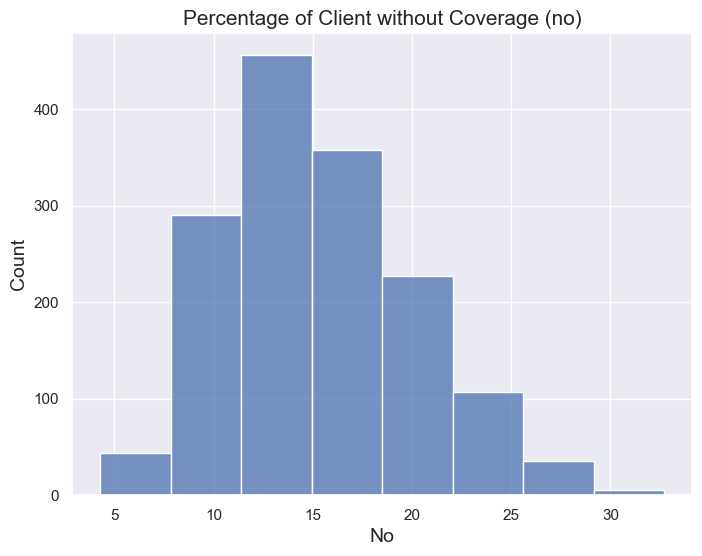

In [87]:
plt.figure(figsize=(8,6))

ax = sns.histplot(data=access_df, x='no', palette='magma', bins=8)

plt.xlabel("No", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Percentage of Client without Coverage (no)", fontsize=15);
print(access_df["no"].value_counts())

Insight: Most of the clients fall in the area of 15 percent for clients without healthcare coverage.


13.0    21
11.1    20
12.8    20
17.1    20
11.5    19
        ..
21.4     1
5.5      1
6.3      1
27.5     1
24.7     1
Name: no, Length: 221, dtype: int64


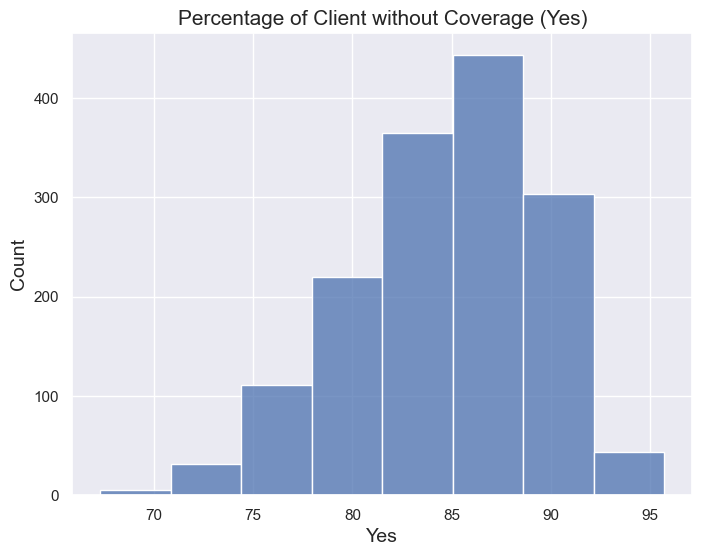

In [88]:
plt.figure(figsize=(8,6))

ax = sns.histplot(data=access_df, x='yes', palette='magma', bins=8)

plt.xlabel("Yes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Percentage of Client without Coverage (Yes)", fontsize=15);
print(access_df["no"].value_counts())

Insight: Most of the clients fall in the area of 85 percent for clients with healthcare coverage.


13.0    21
11.1    20
12.8    20
17.1    20
11.5    19
        ..
21.4     1
5.5      1
6.3      1
27.5     1
24.7     1
Name: no, Length: 221, dtype: int64


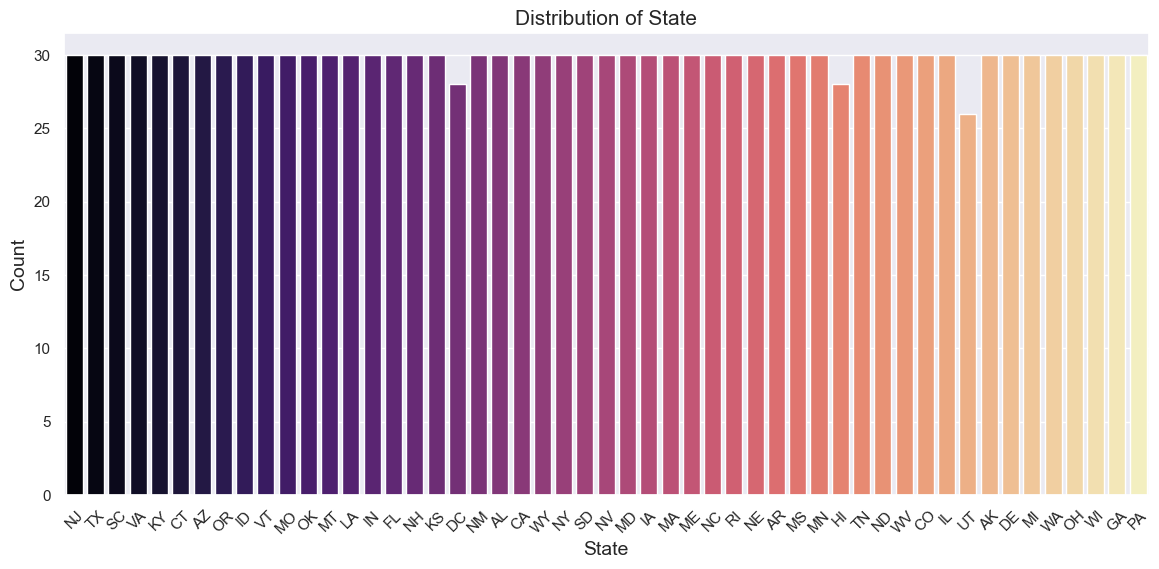

In [89]:
plt.figure(figsize=(14,6))

ax = sns.countplot(data=access_df, x='state', palette='magma')

plt.xlabel("State", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of State", fontsize=15);
plt.xticks(rotation = 45)
print(access_df["no"].value_counts())

Insight: Most of the clients fall in the area of 85 percent for clients with healthcare coverage.


### Describe data

In [90]:
access_df["year"].value_counts()

2009    102
2006    102
2008    102
2007    102
2005    102
1999    102
1998    102
1997    102
2010    102
2003    102
2000    102
1996    100
2004    100
1995     98
2001     51
2002     51
Name: year, dtype: int64

In [91]:
access_df["yes"].value_counts()

87.0    21
88.9    20
87.2    20
82.9    20
85.0    19
        ..
75.6     1
73.5     1
78.6     1
94.5     1
75.3     1
Name: yes, Length: 221, dtype: int64

In [92]:
access_df["no"].value_counts()

13.0    21
11.1    20
12.8    20
17.1    20
11.5    19
        ..
21.4     1
5.5      1
6.3      1
27.5     1
24.7     1
Name: no, Length: 221, dtype: int64

In [93]:
access_df["state"].value_counts()

NJ    30
TX    30
IA    30
MA    30
ME    30
NC    30
RI    30
NE    30
AR    30
MS    30
MN    30
TN    30
ND    30
WV    30
CO    30
IL    30
AK    30
DE    30
MI    30
WA    30
OH    30
WI    30
GA    30
MD    30
NV    30
SD    30
NY    30
SC    30
VA    30
KY    30
CT    30
AZ    30
OR    30
ID    30
VT    30
MO    30
OK    30
MT    30
LA    30
IN    30
FL    30
NH    30
KS    30
NM    30
AL    30
CA    30
WY    30
PA    30
HI    28
DC    28
UT    26
Name: state, dtype: int64

In [94]:
insurance_df["claim"].describe()

count    15000.000000
mean     13401.437620
std      12148.239619
min       1121.900000
25%       4846.900000
50%       9545.650000
75%      16519.125000
max      63770.400000
Name: claim, dtype: float64

In [95]:
insurance_df["bmi"].describe()

count    15000.000000
mean        30.266413
std          5.924606
min         16.000000
25%         25.900000
50%         29.800000
75%         34.100000
max         53.100000
Name: bmi, dtype: float64

In [96]:
insurance_df["weight"].describe()

count    15000.000000
mean        64.909600
std         13.701935
min         34.000000
25%         54.000000
50%         63.000000
75%         76.000000
max         95.000000
Name: weight, dtype: float64

In [97]:
insurance_df["age"].describe()

count    15000.000000
mean        39.547521
std         13.829705
min         18.000000
25%         27.000000
50%         40.000000
75%         51.000000
max         64.000000
Name: age, dtype: float64

In [98]:
insurance_df["gender"].describe()

count    15000.000000
mean         0.510133
std          0.499914
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

In [99]:
insurance_df["state"].describe()

count     15000
unique       35
top          CA
freq       2060
Name: state, dtype: object

In [100]:
insurance_df.describe(include='all')  

,age,gender,weight,bmi,hereditary_diseases,no_of_dependents,smoker,state,diabetes,regular_ex,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2060,NaN,NaN,NaN
mean,39.547521,0.510133,64.909600,30.266413,0.066800,1.129733,0.198133,NaN,0.777000,0.224133,13401.437620
std,13.829705,0.499914,13.701935,5.924606,0.249684,1.228469,0.398606,NaN,0.416272,0.417024,12148.239619
min,18.000000,0.000000,34.000000,16.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1121.900000
25%,27.000000,0.000000,54.000000,25.900000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,4846.900000
50%,40.000000,1.000000,63.000000,29.800000,0.000000,1.000000,0.000000,NaN,1.000000,0.000000,9545.650000
75%,51.000000,1.000000,76.000000,34.100000,0.000000,2.000000,0.000000,NaN,1.000000,0.000000,16519.125000


In [101]:
access_df.describe(include='all')  

,year,state,yes,no
count,1522.000000,1522,1522.000000,1522.000000
unique,NaN,51,NaN,NaN
top,NaN,NJ,NaN,NaN
freq,NaN,30,NaN,NaN
mean,2002.593298,NaN,84.767608,15.232457
std,4.743607,NaN,4.682282,4.682263
min,1995.000000,NaN,67.300000,4.300000
25%,1998.000000,NaN,81.600000,11.700000
50%,2003.000000,NaN,85.400000,14.600000
75%,2007.000000,NaN,88.300000,18.400000


In [102]:
access_df['yes'].describe()

count    1522.000000
mean       84.767608
std         4.682282
min        67.300000
25%        81.600000
50%        85.400000
75%        88.300000
max        95.700000
Name: yes, dtype: float64

In [103]:
access_df['no'].describe()

count    1522.000000
mean       15.232457
std         4.682263
min         4.300000
25%        11.700000
50%        14.600000
75%        18.400000
max        32.700000
Name: no, dtype: float64

In [104]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   gender               15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   state                15000 non-null  object 
 8   diabetes             15000 non-null  int64  
 9   regular_ex           15000 non-null  int64  
 10  claim                15000 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.3+ MB


In [105]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 118 to 1639
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1522 non-null   int64  
 1   state   1522 non-null   object 
 2   yes     1522 non-null   float64
 3   no      1522 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 91.7+ KB


## Exploratory Data Analysis

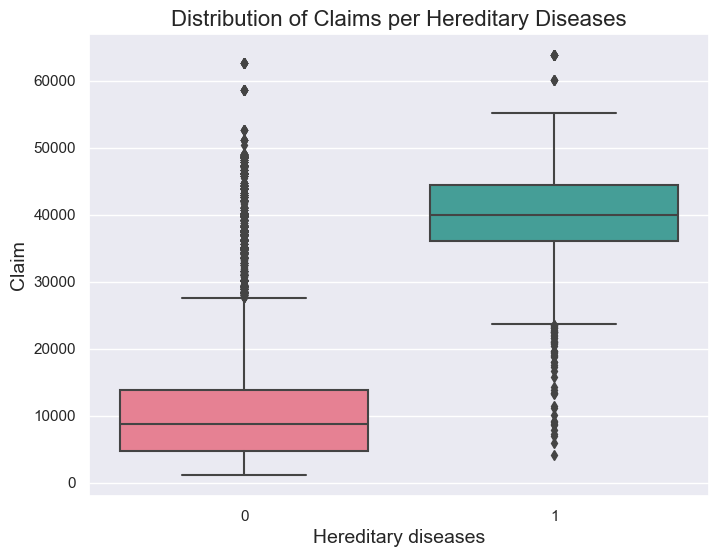

In [106]:
plt.figure(figsize=(8,6))

ax = sns.boxplot(data=insurance_df, palette = "husl", y='claim', x='hereditary_diseases')

plt.ylabel("Claim", fontsize=14)
plt.xlabel("Hereditary diseases", fontsize=14)
plt.title("Distribution of Claims per Hereditary Diseases", fontsize=16);

Insight: Clients with hereditary diseases have higher claims than clients who do not have hereditary diseases.

In [107]:
insurance_df['hereditary_diseases'].describe()

count    15000.000000
mean         0.066800
std          0.249684
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hereditary_diseases, dtype: float64

In [108]:
hereditary_diseases_claim = pd.DataFrame(data=insurance_df.groupby('hereditary_diseases')['claim'].mean()).sort_values(by='claim', ascending=False)
hereditary_diseases_claim.reset_index(inplace=True)
hereditary_diseases_claim


,hereditary_diseases,claim
0,1,39415.140918
1,0,11539.333698


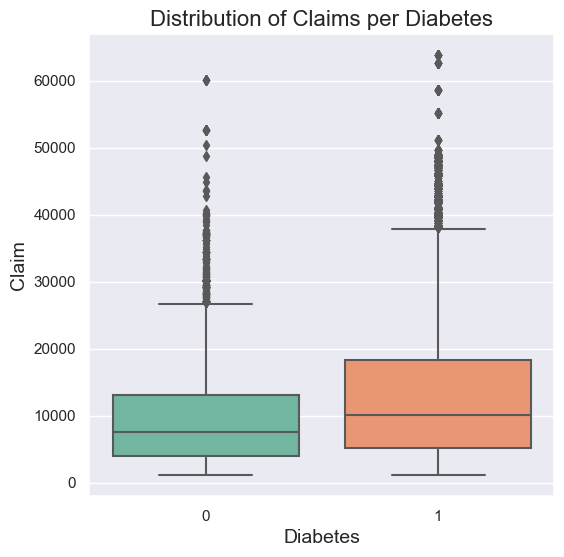

In [149]:
plt.figure(figsize=(6,6))

ax = sns.boxplot(data=insurance_df, palette = "Set2", y='claim', x='diabetes')

plt.ylabel("Claim", fontsize=14)
plt.xlabel("Diabetes", fontsize=14)
plt.title("Distribution of Claims per Diabetes", fontsize=16);

Insight: Clients with diabetes have higher claims than clients without diabetes.

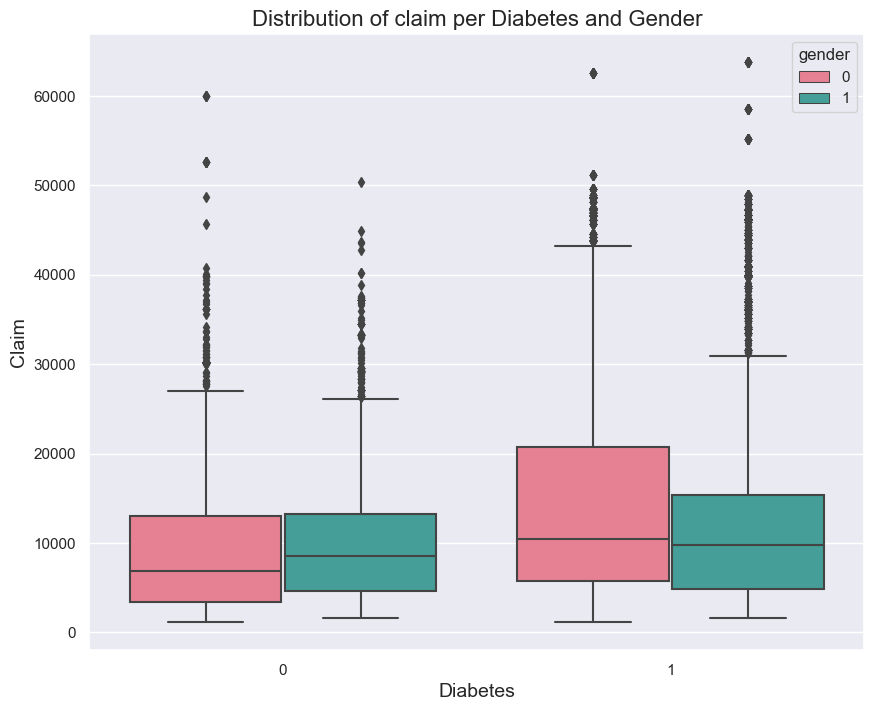

In [110]:
plt.figure(figsize=(10,8))

ax = sns.boxplot(data=insurance_df, palette = "husl", y='claim', x='diabetes', hue = 'gender')

plt.ylabel("Claim", fontsize=14)
plt.xlabel("Diabetes", fontsize=14)
plt.title("Distribution of claim per Diabetes and Gender", fontsize=16);

Insight: Male clients with diabetes have higher claims than Female clients with diabetes, as well as other clients who do not have diabetes.

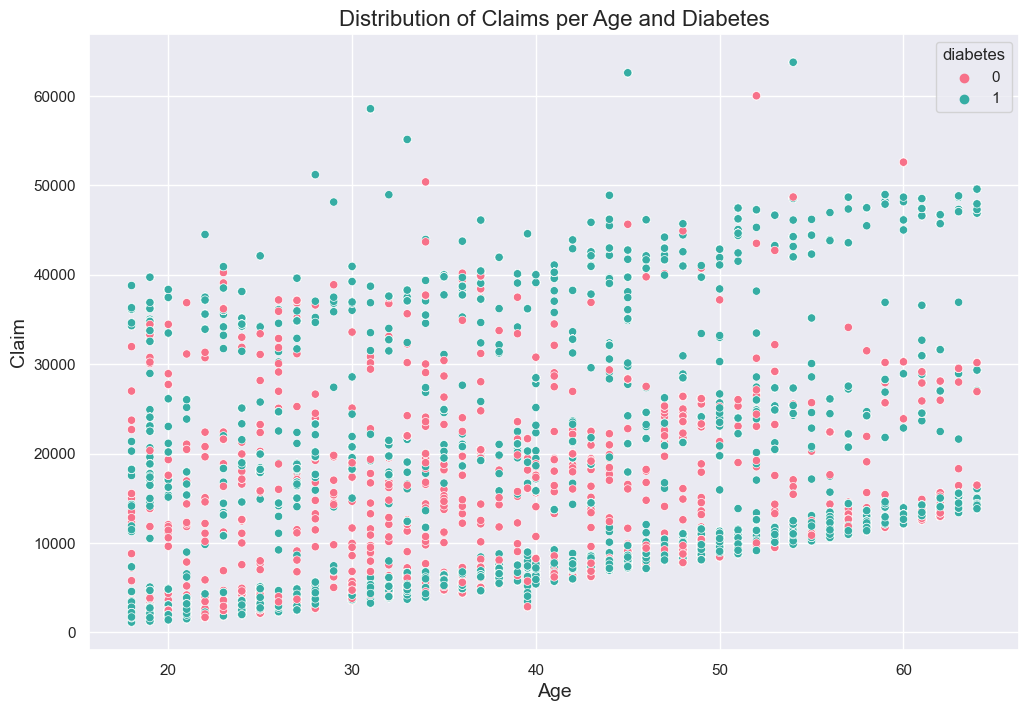

In [111]:
plt.figure(figsize=(12,8))

ax = sns.scatterplot(data=insurance_df, palette = "husl", y='claim', x='age', hue = 'diabetes')

plt.ylabel("Claim", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.title("Distribution of Claims per Age and Diabetes", fontsize=16);

Insight: Clients with diabetes who are older have higher claims than clients who are younger without diabetes.

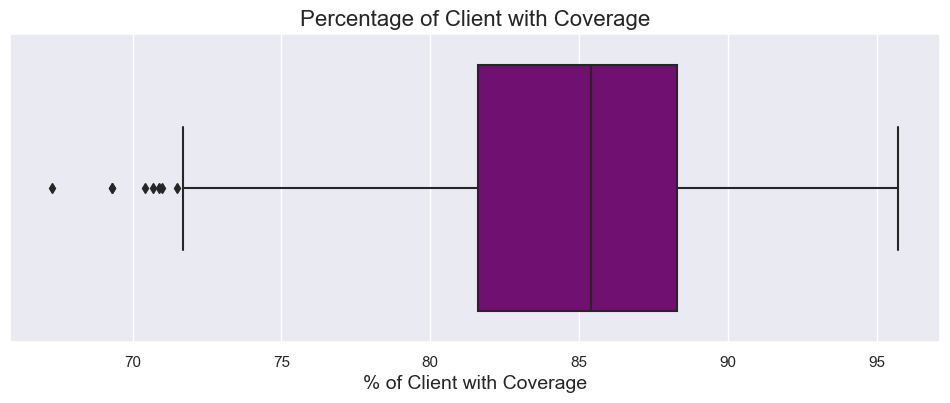

In [112]:
plt.figure(figsize=(12,4))

plt.title("Percentage of Client with Coverage", fontsize=16)

sns.boxplot(x= access_df['yes'], color="purple")

plt.xlabel("% of Client with Coverage", fontsize=14);



Insight: Percentage of Client without Coverage (no)

In [113]:
access_df['yes'].describe()

count    1522.000000
mean       84.767608
std         4.682282
min        67.300000
25%        81.600000
50%        85.400000
75%        88.300000
max        95.700000
Name: yes, dtype: float64

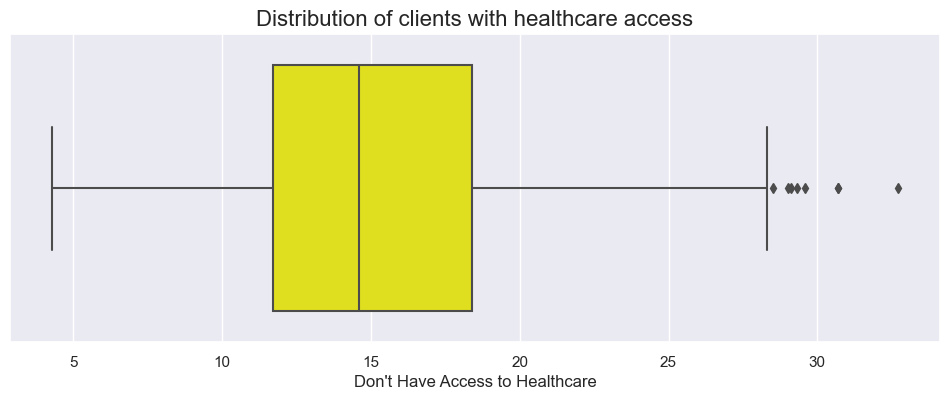

In [114]:
plt.figure(figsize=(12,4))

plt.title("Distribution of clients with healthcare access", fontsize=16)

sns.boxplot(x= access_df['no'], color="yellow")

plt.xlabel("Don't Have Access to Healthcare", fontsize=12);


Insight: Percentage of Client without Coverage (no)

In [115]:
access_df['no'].describe()

count    1522.000000
mean       15.232457
std         4.682263
min         4.300000
25%        11.700000
50%        14.600000
75%        18.400000
max        32.700000
Name: no, dtype: float64

In [116]:
access_df.corr()

,year,yes,no
year,1.000000,-0.134422,0.134442
yes,-0.134422,1.000000,-1.000000
no,0.134442,-1.000000,1.000000


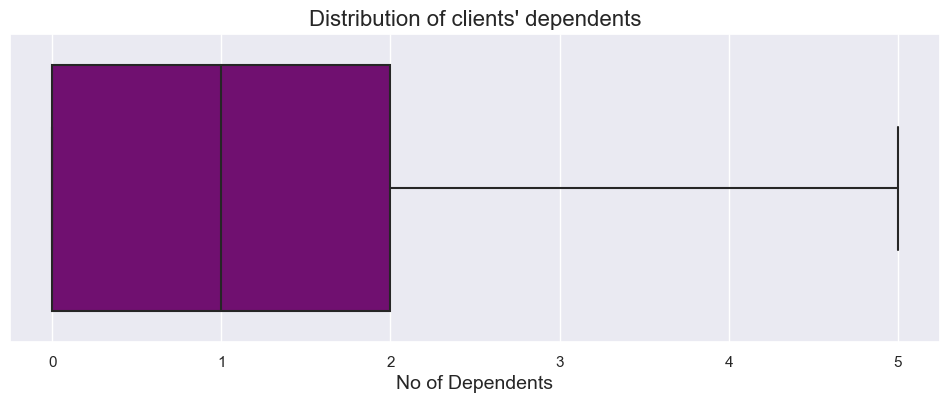

In [117]:
plt.figure(figsize=(12,4))

plt.title("Distribution of clients' dependents", fontsize=16)

sns.boxplot(x=insurance_df['no_of_dependents'], color="purple")

plt.xlabel("No of Dependents", fontsize=14);


Insight: Most of the clients has 0, 1, or 2 dependents.

In [118]:
access_df['no'].describe()

count    1522.000000
mean       15.232457
std         4.682263
min         4.300000
25%        11.700000
50%        14.600000
75%        18.400000
max        32.700000
Name: no, dtype: float64

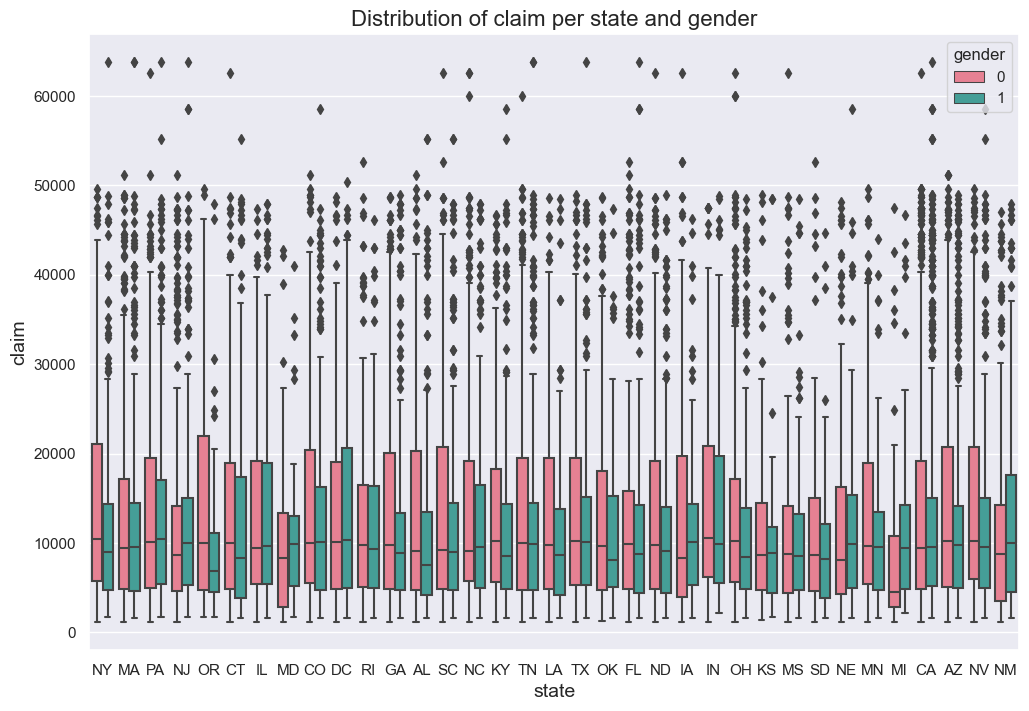

In [119]:
plt.figure(figsize=(12,8))

ax = sns.boxplot(data=insurance_df, palette = "husl", y='claim', x='state', hue = 'gender')

plt.ylabel("claim", fontsize=14)
plt.xlabel("state", fontsize=14)
plt.title("Distribution of claim per state and gender", fontsize=16);

Insight: Claim of the male gender is the highest in all the states, claims of the state IN is the highest for female gender.


In [120]:
dependents_claim = pd.DataFrame(data=insurance_df.groupby('no_of_dependents')['claim'].mean()).sort_values(by='claim', ascending=False)
dependents_claim.reset_index(inplace=True)
dependents_claim

,no_of_dependents,claim
0,3,15527.063187
1,2,15203.368725
2,4,13965.550166
3,1,13107.560552
4,0,12336.580541
5,5,8552.731687


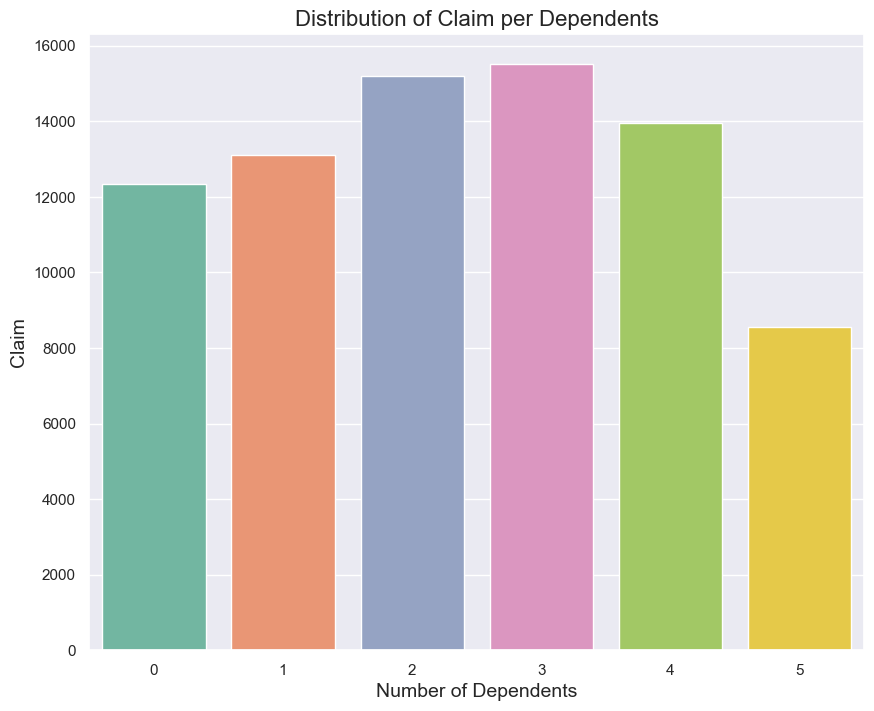

In [121]:
plt.figure(figsize=(10,8));
sns.barplot(data=dependents_claim, x='no_of_dependents', y='claim', palette = "Set2",);
plt.ylabel("Claim", fontsize=14)
plt.xlabel("Number of Dependents", fontsize=14)
plt.title("Distribution of Claim per Dependents", fontsize=16);
plt.show();

Insight: The claims of clients with a number of 3 dependents are higher, followed by  2 and 4 dependents.

In [122]:
insurance_df.groupby('state')['claim'].sum()

state
AL     5083027.3
AZ    12830179.9
CA    27588319.7
CO     6616115.2
CT     5668997.1
DC     3854095.4
FL     6164041.2
GA     8052020.4
IA     3168165.8
IL     3553536.9
IN     3608388.2
KS     1337336.8
KY     5464950.0
LA     3605352.7
MA     7580299.1
MD      805805.0
MI     1191900.4
MN     3029270.7
MS     2735388.4
NC     7309666.6
ND     6319681.7
NE     2983386.8
NJ     6488720.1
NM     4524818.8
NV     7802722.3
NY     5938843.2
OH     7711658.4
OK     3081682.7
OR     1712646.9
PA     8323022.6
RI     3616785.5
SC     7245072.7
SD     1375273.1
TN     9628221.5
TX     5022171.2
Name: claim, dtype: float64

In [123]:
insurance_df.groupby('state')['claim'].mean()

state
AL    12901.084518
AZ    13930.705646
CA    13392.388204
CO    14197.672103
CT    13627.396875
DC    14014.892364
FL    13342.080519
GA    13265.272488
IA    13091.594215
IL    14101.336905
IN    14910.695041
KS    11528.765517
KY    13168.554217
LA    11938.253974
MA    13183.128870
MD    11678.333333
MI    11571.848544
MN    12945.601282
MS    12490.357991
NC    13791.823774
ND    13332.661814
NE    12859.425862
NJ    13434.203106
NM    13077.510983
NV    14212.608925
NY    13747.322222
OH    12917.350754
OK    13113.543404
OR    12592.991912
PA    13871.704333
RI    12917.091071
SC    13392.001294
SD    11855.802586
TN    13353.982663
TX    14028.411173
Name: claim, dtype: float64

In [124]:
state_claim = pd.DataFrame(data=insurance_df.groupby('state')['claim'].mean()).sort_values(by='claim', ascending=False)
state_claim.reset_index(inplace=True)
state_claim

,state,claim
0,IN,14910.695041
1,NV,14212.608925
2,CO,14197.672103
3,IL,14101.336905
4,TX,14028.411173
5,DC,14014.892364
6,AZ,13930.705646
7,PA,13871.704333
8,NC,13791.823774
9,NY,13747.322222


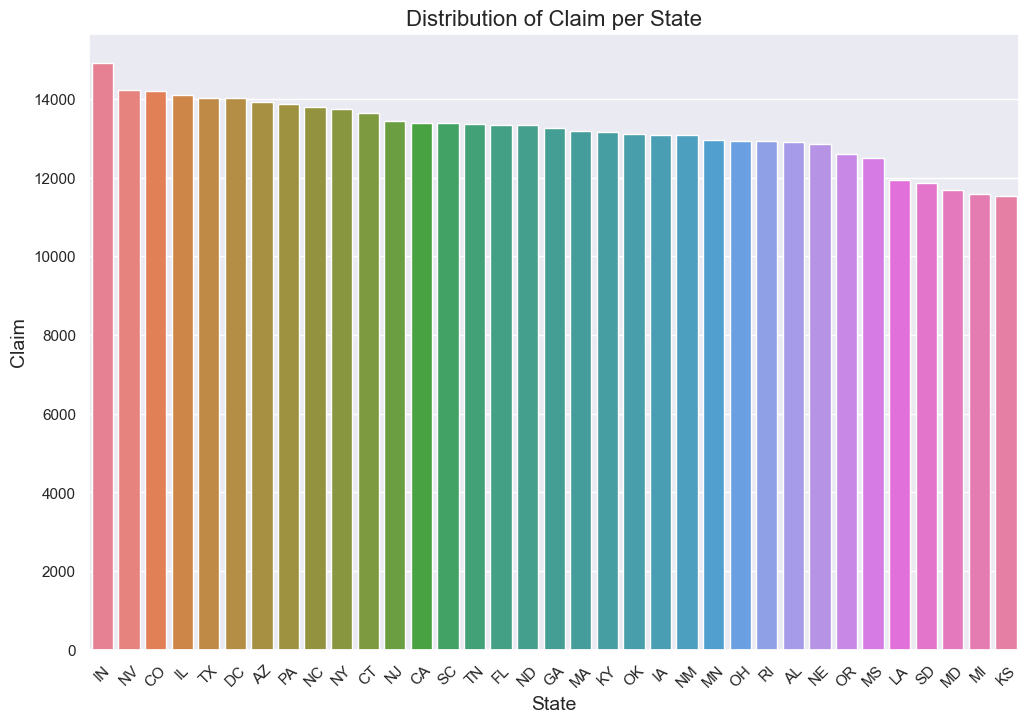

In [125]:
plt.figure(figsize=(12,8));
sns.barplot(data=state_claim, x='state', y='claim', palette = "husl",);
plt.ylabel("Claim", fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Distribution of Claim per State", fontsize=16);
plt.xticks(rotation = 45)
plt.show();

Insight: Residents in the state Indiana have the highest claims on average, and the residents in Kansas have the lowest claims on average.

In [126]:
insurance_df.groupby('age')['claim'].mean()

age
18.000000     7035.205339
19.000000    10029.601531
20.000000    10353.828674
21.000000     5824.571467
22.000000    12280.183183
23.000000    11511.603846
24.000000    10775.353988
25.000000     7814.740441
26.000000     7240.821583
27.000000    12248.992698
28.000000     9675.855864
29.000000    19830.095652
30.000000    10915.312418
31.000000     9930.919377
32.000000     9685.468454
33.000000    10974.252351
34.000000    10976.760360
35.000000    12364.439490
36.000000    11454.570068
37.000000    16215.807554
38.000000     9132.805283
39.000000    13700.065185
39.547521     9291.943434
40.000000    12214.315974
41.000000    11443.012541
42.000000    12418.528529
43.000000    19142.735235
44.000000    17163.410438
45.000000    16553.865944
46.000000    15518.917492
47.000000    16712.631118
48.000000    14538.129276
49.000000    12717.694386
50.000000    14335.792562
51.000000    15871.224930
52.000000    17595.249558
53.000000    17049.340453
54.000000    19715.758382
55.00000

In [127]:
age_claim = pd.DataFrame(data=insurance_df.groupby('age')['claim'].mean()).sort_values(by='claim', ascending=False)
age_claim.reset_index(inplace=True)
age_claim

,age,claim
0,61.000000,24683.120379
1,64.000000,23416.845059
2,60.000000,23106.518443
3,29.000000,19830.095652
4,54.000000,19715.758382
5,62.000000,19273.431325
6,43.000000,19142.735235
7,63.000000,19006.248246
8,59.000000,18239.967290
9,52.000000,17595.249558


In [128]:
age_claim.age=age_claim.age.astype(str)

In [129]:
age_claim = age_claim.drop(index=42)

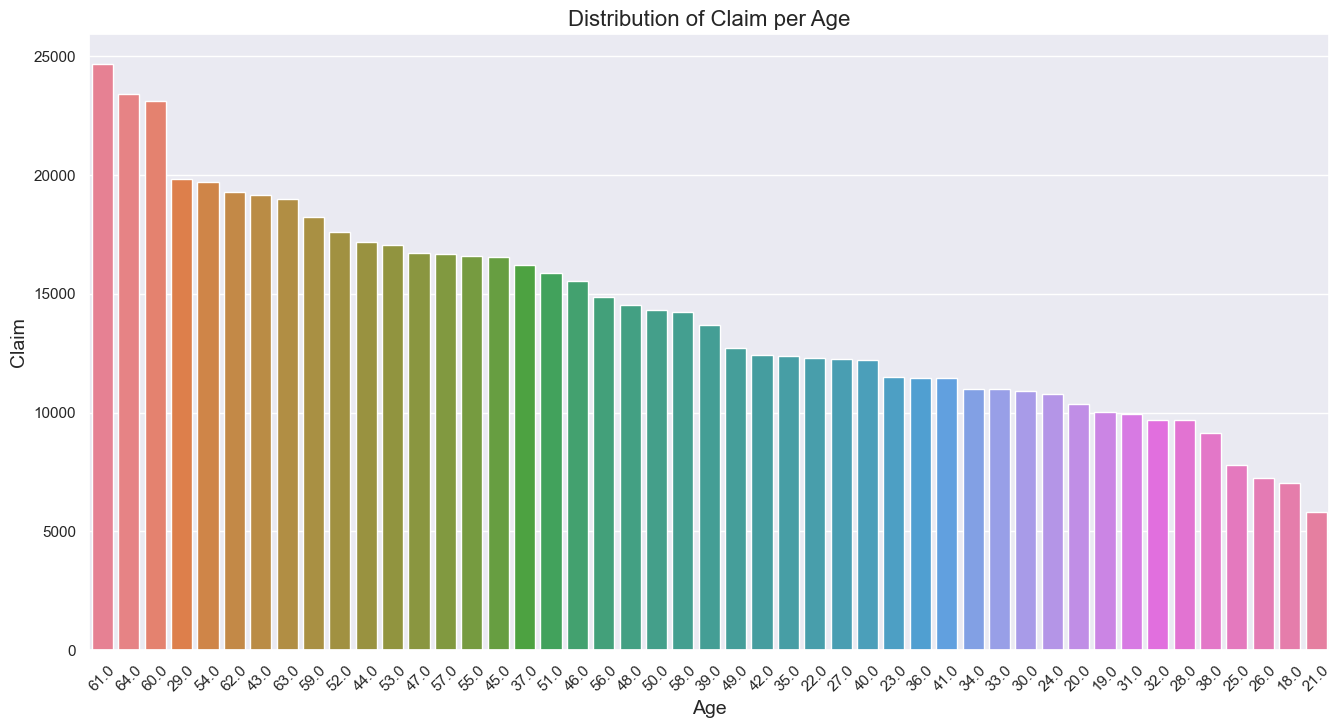

In [130]:
plt.figure(figsize=(16,8));
sns.barplot(data=age_claim, x='age', y='claim', palette = "husl");
plt.ylabel("Claim", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.title("Distribution of Claim per Age", fontsize=16);
plt.xticks(rotation = 45)
plt.show();

Insight: Clients who are older have higher claims, compared to younger clients who have the lower claims.

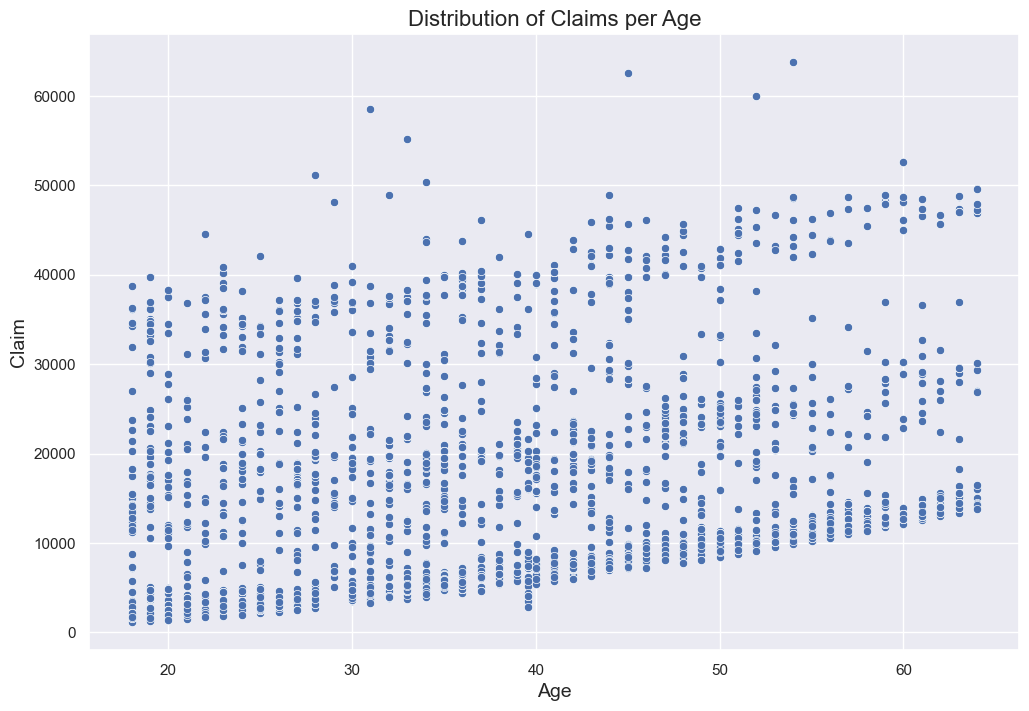

In [131]:
plt.figure(figsize=(12,8))

ax = sns.scatterplot(data=insurance_df, palette = "husl", y='claim', x='age')

plt.ylabel("Claim", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.title("Distribution of Claims per Age", fontsize=16);

Insight: Clients who are older have higher claims, compared to younger clients who have the lower claims.

In [132]:
access_df.groupby('state')['yes'].mean()
state_yes = pd.DataFrame(data=access_df.groupby('state')['yes'].mean()).sort_values(by='yes', ascending=False)
state_yes.reset_index(inplace=True)
state_yes

,state,yes
0,HI,92.171429
1,MN,91.746667
2,MA,91.286667
3,DE,90.120000
4,CT,89.670000
5,WI,89.566667
6,DC,89.214286
7,IA,89.213333
8,PA,88.380000
9,MD,88.220000


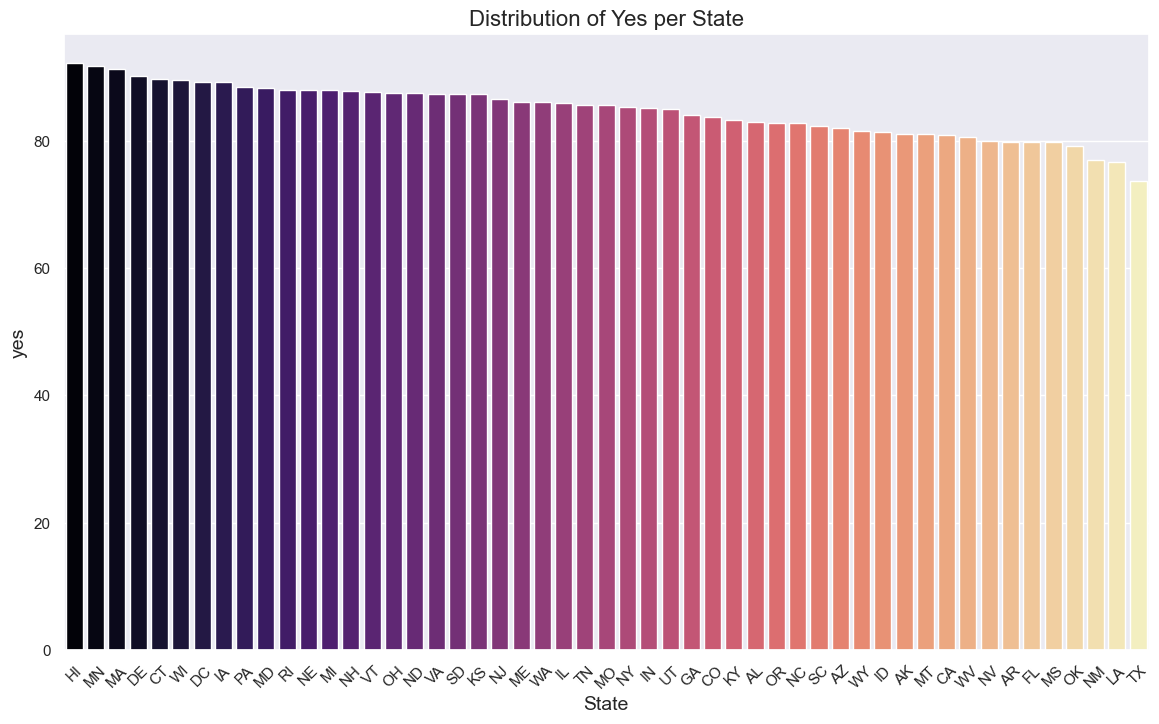

In [133]:
plt.figure(figsize=(14,8))

sns.barplot(data=state_yes, x='state', y='yes', palette = "magma");
plt.ylabel("yes", fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Distribution of Yes per State", fontsize=16);
plt.xticks(rotation = 45)
plt.show();

Insight: state/yes: Residents in the state of Hawaii have the highest percentage of healthcare coverage on average, and the residents in Taxes have the lowest percentage of healthcare coverage on average.

In [134]:
access_df.groupby('state')['no'].mean()
state_no = pd.DataFrame(data=access_df.groupby('state')['no'].mean()).sort_values(by='no', ascending=False)
state_no.reset_index(inplace=True)
state_no

,state,no
0,TX,26.260000
1,LA,23.296667
2,NM,23.063333
3,OK,20.770000
4,MS,20.180000
5,FL,20.170000
6,AR,20.163333
7,NV,20.053333
8,WV,19.466667
9,CA,19.050000


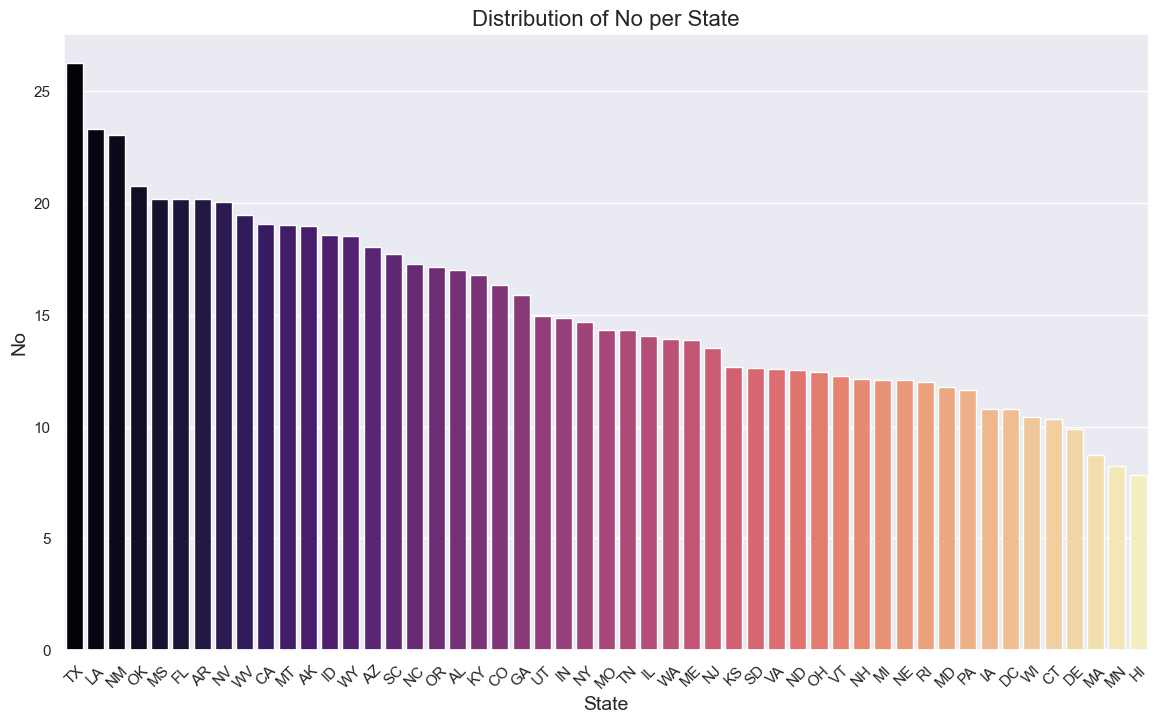

In [135]:
plt.figure(figsize=(14,8))

sns.barplot(data=state_no, x='state', y='no', palette = "magma");
plt.ylabel("No", fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Distribution of No per State", fontsize=16);
plt.xticks(rotation = 45)
plt.show();

Insight: state/no the residents in Taxes have the lowest access to healthcare coverage on average and residents in the state Hawaii have the highest access to healthcare coverage on average.

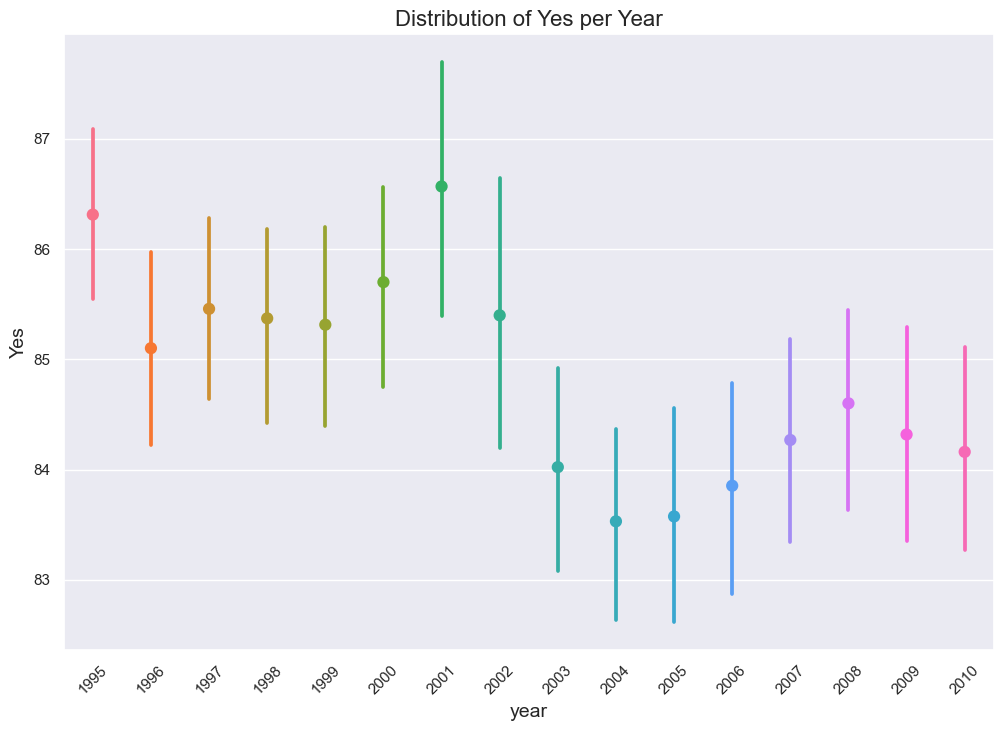

In [136]:
plt.figure(figsize=(12,8))

sns.pointplot(data=access_df, x='year', y='yes', palette = "husl");
plt.ylabel("Yes", fontsize=14)
plt.xlabel("year", fontsize=14)
plt.title("Distribution of Yes per Year", fontsize=16);
plt.xticks(rotation = 45)
plt.show();

Insight: year/yes: The percentage of clients with health insurance decrease in the later years compared to the earlier years.

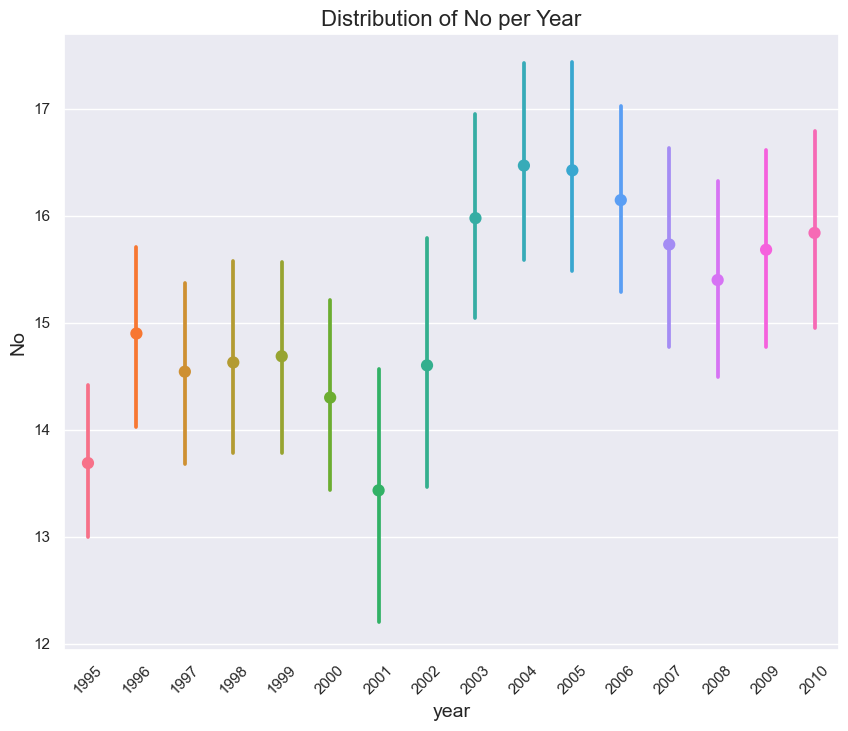

In [137]:
plt.figure(figsize=(10,8))

sns.pointplot(data=access_df, x='year', y='no', palette = "husl");
plt.ylabel("No", fontsize=14)
plt.xlabel("year", fontsize=14)
plt.title("Distribution of No per Year", fontsize=16);
plt.xticks(rotation = 45)
plt.show();

Insight: year/no: The percentage of clients without health insurance increases in the later years compared to the earlier years.

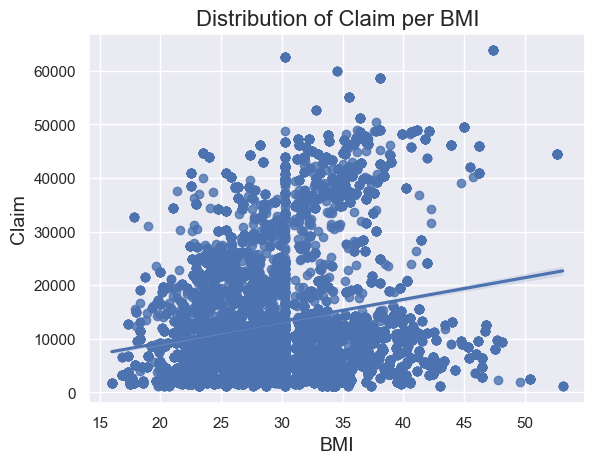

In [138]:
sns.regplot(data=insurance_df, x="bmi", y="claim");
plt.ylabel("Claim", fontsize=14)
plt.xlabel("BMI", fontsize=14)
plt.title("Distribution of Claim per BMI", fontsize=16);


Insight: There is a positive correlation, the higher the bmi the higher the claim becomes.

In [139]:
pearsonr(insurance_df['claim'], insurance_df['bmi'])

(0.1979392462711738, 2.2360423516703778e-132)

In [140]:
spearmanr(insurance_df['claim'], insurance_df['bmi'])

SpearmanrResult(correlation=0.16339302822493415, pvalue=2.957384838079386e-90)

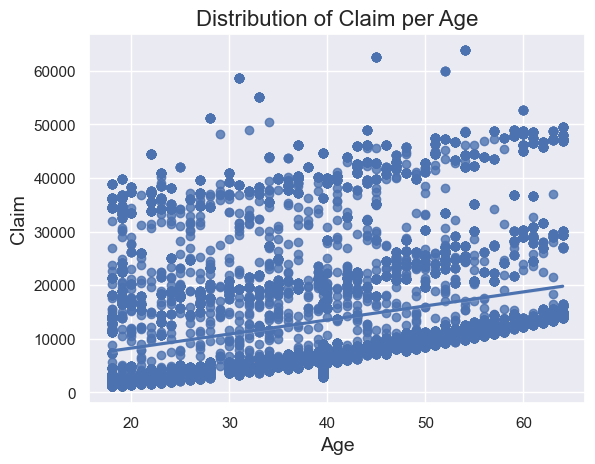

In [141]:
sns.regplot(data=insurance_df, x="age", y="claim")
plt.ylabel("Claim", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.title("Distribution of Claim per Age", fontsize=16);


Insight: There is a positive correlation, the older the age the higher the claim becomes.

In [142]:
pearsonr(insurance_df['claim'], insurance_df['age'])

(0.29835946999741747, 5.029272066664011e-306)

In [143]:
spearmanr(insurance_df['claim'], insurance_df['age'])

SpearmanrResult(correlation=0.5317014433955641, pvalue=0.0)

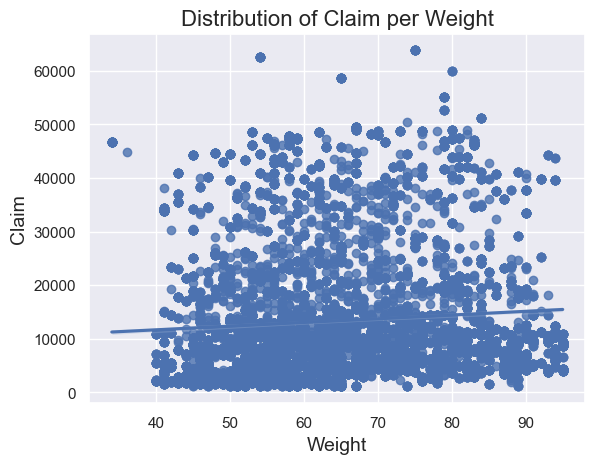

In [144]:
sns.regplot(data=insurance_df, x="weight", y="claim")
plt.ylabel("Claim", fontsize=14)
plt.xlabel("Weight", fontsize=14)
plt.title("Distribution of Claim per Weight", fontsize=16);


Insight: There is no correlation at all.

In [145]:
pearsonr(insurance_df["weight"], insurance_df["claim"])

(0.07771621803000822, 1.544618596668314e-21)

In [146]:
spearmanr(insurance_df['claim'], insurance_df['weight'])

SpearmanrResult(correlation=0.16909487239295018, pvalue=1.277518467218224e-96)

### Project Finding Summary

>The results of this project are that having hereditary diseases and diabetes impacts clients’ claim by increasing it. The clients' claims increase based on older age, higher BMI, and residency in specific states.

>The changes in healthcare coverage between the years 1995 to 2010 show that the percentage of clients with health insurance did decrease during the recession and before the Obama's Affordable Care Act was introduced compared to the earlier years 1995 to 2000. 

>The healthcare coverage between states show that the residents in the state Hawaii have the highest access to healthcare coverage on average compared to the residents in state of Taxes who have the lowest access to healthcare coverage on average between the years 1995 to 2010.

>Insurance companies should have a preventative measures to improve the health outcomes and health factors in order to reduce the amount of claims and improve clients' lives. As Health factors do affect the claims of clients, for better population health. 

>My next steps would be finding data about healthcare access in the recent years to visualize the changes in the recent years, see if the status of healthcare coverage has increased or decreased in the last few years after 2010. 